In [14]:
import pandas as pd

Dữ liệu liên quan đến cổ phiếu Vin Group (VIC)

In [15]:
df = pd.read_csv("data/data.csv")
df = df.loc[:,~df.columns.str.match("Unnamed")]
df = df.sort_values(by=['Date'], ignore_index=True)
df

Date  Change  Open   Max   Min  Close  Average  Adj Close  \
0     2012-11-14    0.00  77.0  78.5  77.0   78.0    78.00      16.53   
1     2012-11-15   -0.64  77.0  78.0  77.0   77.5    77.50      16.42   
2     2012-11-16    0.00  77.0  77.5  76.5   77.5    77.50      16.42   
3     2012-11-19   -0.65  76.5  77.5  76.0   77.0    77.00      16.32   
4     2012-11-20    0.00  77.0  77.0  75.5   77.0    77.00      16.32   
...          ...     ...   ...   ...   ...    ...      ...        ...   
2489  2022-11-08   -0.19  52.2  53.3  49.7   53.3    51.37      53.30   
2490  2022-11-09    0.75  53.3  54.3  52.2   53.7    53.53      53.70   
2491  2022-11-10   -1.30  53.6  54.0  52.0   53.0    53.21      53.00   
2492  2022-11-11    2.45  53.0  54.8  52.5   54.3    54.04      54.30   
2493  2022-11-14    1.29  54.2  55.5  53.1   55.0    55.01      55.00   

         Vol.  Total Trade Foreign Quantity  Total Money value Foreign  \
0       30740                         14810                    1155225   
1      917090                         28600                    2216015   
2       26820                         19410                    1499660   
3       37530                         29930                    2293865   
4       30340                         21010                    1612670   
...       ...                           ...                        ...   
2489  3076100                       1683808                   85134020   
2490  1573900                       1139332                   61083410   
2491  1558000                       1084361                   57885670   
2492   938500                        771718                   41797960   
2493  1394600                       1034489                   57003870   

      Total Trade Domestic Quantity  Total Money value Domestic  VN 30 Price  \
0                               990                     2397720       458.21   
1                              1430                    68422475       457.08   
2                              1450                     2078550       455.67   
3                              1910                     2889810       452.36   
4                              1520                     2336180       455.10   
...                             ...                         ...          ...   
2489                           4562                   159009093       980.09   
2490                           3915                    84248726       979.68   
2491                           1540                    82900043       936.80   
2492                           3733                    50716972       948.86   
2493                           4853                    76714185       936.31   

      VN Index Price  
0             387.71  
1             386.91  
2             385.71  
3             383.32  
4             385.10  
...              ...  
2489          981.65  
2490          985.59  
2491          947.24  
2492          954.53  
2493          941.04  

[2494 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           2494 non-null   object 
 1   Change                         2494 non-null   float64
 2   Open                           2494 non-null   float64
 3   Max                            2494 non-null   float64
 4   Min                            2494 non-null   float64
 5   Close                          2494 non-null   float64
 6   Average                        2494 non-null   float64
 7   Adj Close                      2494 non-null   float64
 8   Vol.                           2494 non-null   int64  
 9   Total Trade Foreign Quantity   2494 non-null   int64  
 10  Total Money value Foreign      2494 non-null   int64  
 11  Total Trade Domestic Quantity  2494 non-null   int64  
 12  Total Money value Domestic     2494 non-null   i

Xác định thông tin nào cần sử dụng cho bài toán

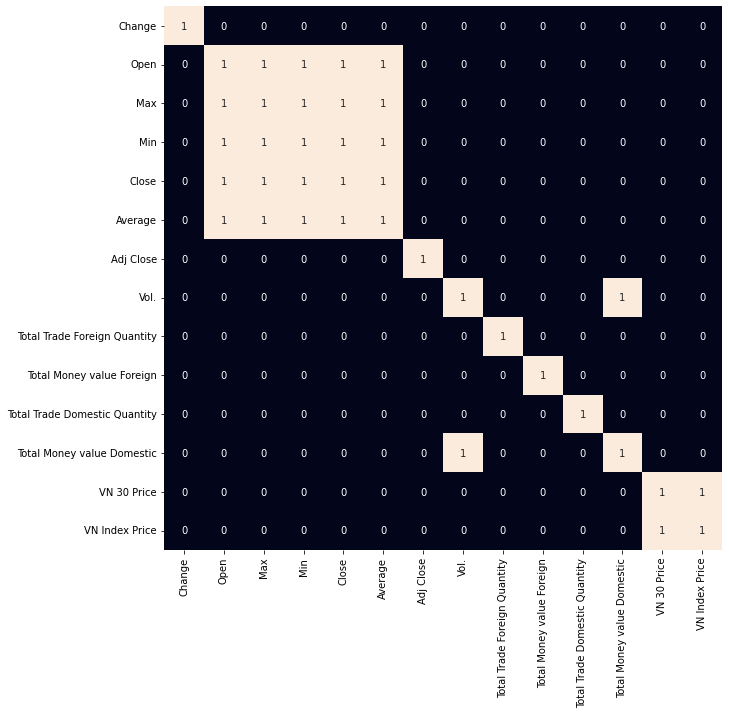

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10, 10))
 
# Vẽ đồ thị biểu hiện mối tương quan giữa các field trong data
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
# Giữa 5 cột Open, Max, Min, Close, Average có mối tương quan với nhau nên ta chỉ giữ 1 cột. Và ta chọn cột Open vì đây sẽ là giá trị mà ta sẽ dự đoán.
# Tương tự Total Money value Domestic và Vol cũng tương quan với nhau nên ta sẽ giữ lại cột Vol.
# VN 30 Price và VN Index Price cũng tương quan nên giữ lại VN Index Price thôi.

Xử lý data

In [16]:
# Tách bộ dữ liệu thành 2 bộ train và test
length_data = len(df)     
split_ratio = 0.7           
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2494
Train data length : 1746
Validation data lenth : 748


In [17]:
train_data = df[:length_train].iloc[:,[True, True, True, False, False, False, False, True, True, True, True, True, False, False, True]] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # chuyển data cột Date thành datetime
train_data

Date  Change   Open  Adj Close    Vol.  \
0    2012-11-14    0.00   77.0      16.53   30740   
1    2012-11-15   -0.64   77.0      16.42  917090   
2    2012-11-16    0.00   77.0      16.42   26820   
3    2012-11-19   -0.65   76.5      16.32   37530   
4    2012-11-20    0.00   77.0      16.32   30340   
...         ...     ...    ...        ...     ...   
1741 2019-11-12    0.42  118.9     106.13  633520   
1742 2019-11-13   -0.34  118.9     105.78  891190   
1743 2019-11-14    0.25  119.0     106.04  250100   
1744 2019-11-15    0.25  119.2     106.31  258410   
1745 2019-11-18   -1.25  119.8     104.98  717820   

      Total Trade Foreign Quantity  Total Money value Foreign  \
0                            14810                    1155225   
1                            28600                    2216015   
2                            19410                    1499660   
3                            29930                    2293865   
4                            21010                    1612670   
...                            ...                        ...   
1741                         57761                   69232310   
1742                         75430                   90258910   
1743                        197840                   23588170   
1744                        184910                   22139820   
1745                         73657                   87978140   

      Total Trade Domestic Quantity  VN Index Price  
0                               990          387.71  
1                              1430          386.91  
2                              1450          385.71  
3                              1910          383.32  
4                              1520          385.10  
...                             ...             ...  
1741                          14400         1018.33  
1742                          16600         1012.77  
1743                           3279         1012.30  
1744                           2418         1010.03  
1745                          10263         1002.91  

[1746 rows x 9 columns]

In [18]:
validation_data = df[length_train:].iloc[:,[True, True, True, False, False, False, False, True, True, True, True, True, False, False, True]]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

Date  Change   Open  Adj Close     Vol.  \
1746 2019-11-19   -0.85  118.0     104.09   491510   
1747 2019-11-20   -0.94  117.2     103.11   705410   
1748 2019-11-21   -0.60  117.0     102.49  1567980   
1749 2019-11-22    0.78  115.9     103.29   308940   
1750 2019-11-25   -0.17  116.2     103.11   234180   
...         ...     ...    ...        ...      ...   
2489 2022-11-08   -0.19   52.2      53.30  3076100   
2490 2022-11-09    0.75   53.3      53.70  1573900   
2491 2022-11-10   -1.30   53.6      53.00  1558000   
2492 2022-11-11    2.45   53.0      54.30   938500   
2493 2022-11-14    1.29   54.2      55.00  1394600   

      Total Trade Foreign Quantity  Total Money value Foreign  \
1746                        489550                   57450510   
1747                        778010                   90376430   
1748                       1277240                  146660360   
1749                        192170                   22273310   
1750                        190090                   22035660   
...                            ...                        ...   
2489                       1683808                   85134020   
2490                       1139332                   61083410   
2491                       1084361                   57885670   
2492                        771718                   41797960   
2493                       1034489                   57003870   

      Total Trade Domestic Quantity  VN Index Price  
1746                           3056         1008.35  
1747                           9682         1000.56  
1748                          13448          987.89  
1749                           2758          977.78  
1750                          14390          976.35  
...                             ...             ...  
2489                           4562          981.65  
2490                           3915          985.59  
2491                           1540          947.24  
2492                           3733          954.53  
2493                           4853          941.04  

[748 rows x 9 columns]

In [19]:
dataset_train = train_data.iloc[:, 1:].values
dataset_train.shape

(1746, 8)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range = (0,1))
scaler2 = MinMaxScaler(feature_range = (0,1))

In [21]:
#Scale dữ liệu
dataset_train_scaled = scaler1.fit_transform(dataset_train)
dataset_train_scaled.shape

(1746, 8)

In [22]:
import numpy as np
X_train = []
y_train = []

time_step = 14

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i])
    y_train.append(dataset_train[i][1])

y_train = np.reshape(y_train, (len(y_train),1))
y_train = scaler2.fit_transform(y_train)
y_train.shape
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

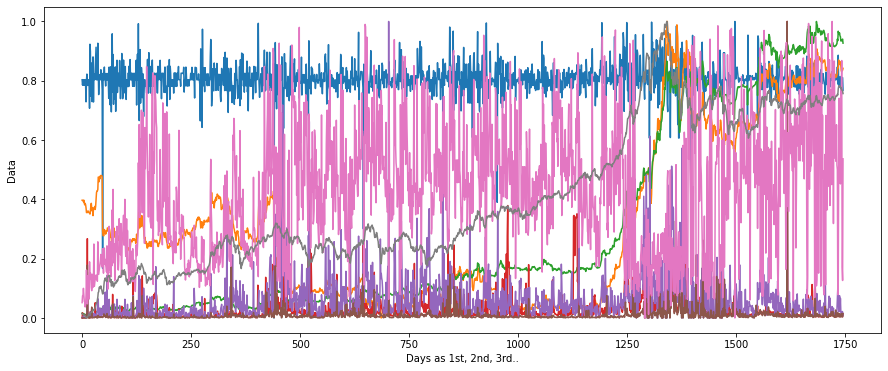

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Data")
plt.show()

In [23]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1732, 14, 8)
Shape of y_train before reshape : (1732, 1)


Xây dựng các mô hình học máy để dự đoán.

In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Conv1D, MaxPool1D, Flatten, Input, Reshape
from sklearn import svm
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import explained_variance_score, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

RNN model

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(units = 200, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 200, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 200, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 200))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))
rnn.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

start_time = time.time()
rnn_history = rnn.fit(X_train, y_train, epochs = 100, batch_size = 32)
rnn.save("models/RNN_model.h5")
end_time = time.time()
rnn_training_time = end_time - start_time

Epoch 1/100
55/55 [==============================] - 4s 36ms/step - loss: 0.7045 - accuracy: 5.7737e-04
Epoch 2/100
55/55 [==============================] - 2s 33ms/step - loss: 0.4083 - accuracy: 0.0017
Epoch 3/100
55/55 [==============================] - 2s 32ms/step - loss: 0.3095 - accuracy: 5.7737e-04
Epoch 4/100
55/55 [==============================] - 2s 32ms/step - loss: 0.3105 - accuracy: 0.0017ETA: 0s - loss: 0.3327 
Epoch 5/100
55/55 [==============================] - 2s 33ms/step - loss: 0.2440 - accuracy: 0.0017
Epoch 6/100
55/55 [==============================] - 2s 33ms/step - loss: 0.2251 - accuracy: 0.0012
Epoch 7/100
55/55 [==============================] - 2s 33ms/step - loss: 0.1867 - accuracy: 0.0012
Epoch 8/100
55/55 [==============================] - 2s 33ms/step - loss: 0.1427 - accuracy: 0.0017
Epoch 9/100
55/55 [==============================] - 2s 33ms/step - loss: 0.1504 - accuracy: 0.0017
Epoch 10/100
55/55 [==============================] - 2s 32ms/step - 

Multilayer Perceptron (MLP) model

In [26]:
X_train_2d = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_train_2d.shape

(1732, 112)

In [ ]:
MLP = Sequential()
MLP.add(Reshape((X_train_2d.shape[1],), input_shape = (X_train_2d.shape[1],1)))
MLP.add(Dense(512, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(256, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(128, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(64, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(32, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(1))
MLP.compile(optimizer = 'Adam', loss = "mean_squared_error",  metrics = ["accuracy"])

start_time = time.time()
mlp_history = MLP.fit(X_train_2d, y_train, batch_size=32, epochs=100)
MLP.save("models/MLP_model.h5")
end_time = time.time()
mlp_training_time = end_time - start_time

Epoch 1/100
55/55 [==============================] - 1s 6ms/step - loss: 0.3191 - accuracy: 0.0012
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 0.1543 - accuracy: 0.0012
Epoch 3/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0938 - accuracy: 0.0012
Epoch 4/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0610 - accuracy: 0.0012
Epoch 5/100
55/55 [==============================] - 0s 9ms/step - loss: 0.0422 - accuracy: 0.0012
Epoch 6/100
55/55 [==============================] - 0s 9ms/step - loss: 0.0377 - accuracy: 0.0012
Epoch 7/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.0017
Epoch 8/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.0012
Epoch 9/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0200 - accuracy: 0.0017
Epoch 10/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.0017
Epoch 11/

LSTM model

In [ ]:
lstm = Sequential()
lstm.add(LSTM(100,return_sequences=True,input_shape = (X_train.shape[1],8)))
lstm.add(LSTM(100, return_sequences= False))
lstm.add(Dense(64))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

start_time = time.time()
lstm_history = lstm.fit(X_train, y_train, epochs = 20, batch_size = 32)
lstm.save("models/LSTM_model.h5")
end_time = time.time()
lstm_training_time = end_time - start_time


Epoch 1/20
55/55 [==============================] - 5s 43ms/step - loss: 0.0087 - accuracy: 0.0017
Epoch 2/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 3/20
55/55 [==============================] - 1s 21ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 4/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 5/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 6/20
55/55 [==============================] - 1s 19ms/step - loss: 0.0010 - accuracy: 0.0017
Epoch 7/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0010 - accuracy: 0.0017
Epoch 8/20
55/55 [==============================] - 1s 21ms/step - loss: 8.4688e-04 - accuracy: 0.0017
Epoch 9/20
55/55 [==============================] - 1s 21ms/step - loss: 7.6002e-04 - accuracy: 0.0017
Epoch 10/20
55/55 [==============================] - 1s 21ms/step - loss: 6.7732e-04 - accuracy: 0.00

CNN model

In [ ]:
cnn = Sequential()
cnn.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
cnn.add(Conv1D(10, kernel_size=(10), activation="tanh"))
cnn.add(Conv1D(10, kernel_size=(3), activation="tanh")),
cnn.add(MaxPool1D(pool_size=(1))),
cnn.add(Conv1D(10, kernel_size=(3), activation="tanh")),
cnn.add(MaxPool1D(pool_size=(1))),
cnn.add(Flatten()),
cnn.add(Dropout(0.1)),
cnn.add(Dense(1, activation="tanh"))
cnn.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

start_time = time.time()
cnn_history = cnn.fit(X_train, y_train, epochs = 50, batch_size = 32)
cnn.save("models/CNN_model.h5")
end_time = time.time()
cnn_training_time = end_time - start_time

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 0.0017
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.0017
Epoch 3/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 5/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.0017
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.0017
Epoch 7/50
55/55 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0017
Epoch 8/50
55/55 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.0017
Epoch 9/50
55/55 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.0017
Epoch 10/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.0017
Epoch 11/50
55/55 [

Support Vector Machine model (SVM)

In [33]:
start_time = time.time()
svm_m = svm.SVR(kernel='rbf')
svm_m.fit(X_train_2d, np.reshape(y_train, (-1)))
pickle.dump(svm_m, open("models/SVM_model.h5", 'wb'))
end_time = time.time()
svm_training_time = end_time - start_time

Linear Regression model

In [34]:
start_time = time.time()
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_2d, np.reshape(y_train, (-1)))
pickle.dump(lr, open("models/LR_model.h5", 'wb'))
end_time = time.time()
lr_training_time = end_time - start_time

Compare Training time

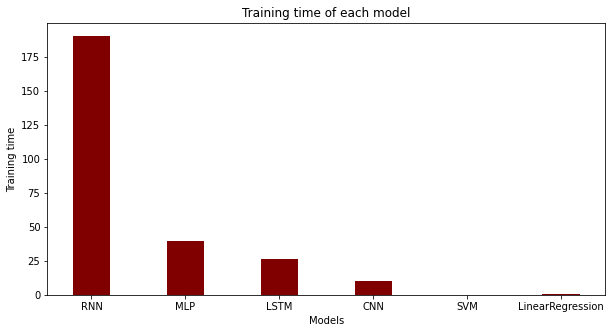

In [ ]:
# creating the dataset
data = {'RNN':rnn_training_time,
        'MLP':mlp_training_time,
        'LSTM':lstm_training_time,
        'CNN':cnn_training_time,
        'SVM': svm_training_time,
        'LinearRegression': lr_training_time}
models = list(data.keys())
training_times = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, training_times, color ='maroon', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Training time")
plt.title("Training time of each model")
plt.show()

Losses

Text(0.5, 1.0, 'CNN losses')

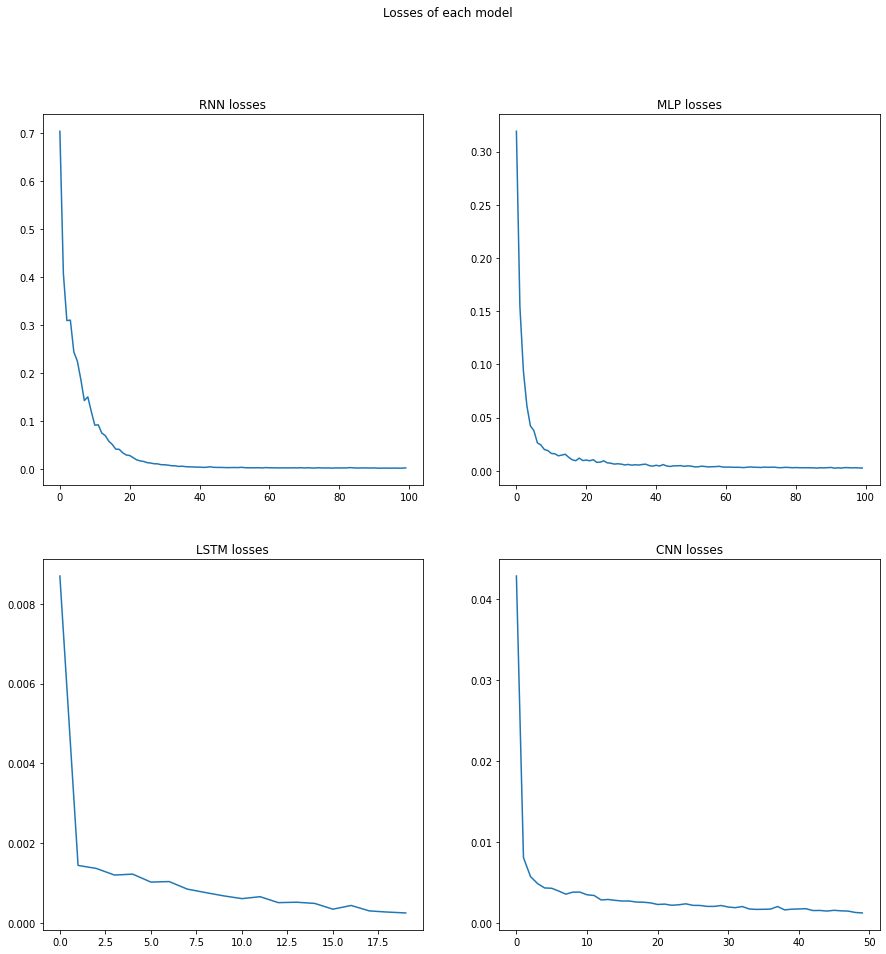

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15, 15))
fig.suptitle('Losses of each model')
axs[0][0].plot(rnn_history.history["loss"])
axs[0][0].set_title('RNN losses')
axs[0][1].plot(mlp_history.history["loss"])
axs[0][1].set_title('MLP losses')
axs[1][0].plot(lstm_history.history["loss"])
axs[1][0].set_title('LSTM losses')
axs[1][1].plot(cnn_history.history["loss"])
axs[1][1].set_title('CNN losses')

In [27]:
from tensorflow import keras
rnn = keras.models.load_model("models/RNN_model.h5")
MLP = keras.models.load_model("models/MLP_model.h5")
lstm = keras.models.load_model("models/LSTM_model.h5")
cnn = keras.models.load_model("models/CNN_model.h5")

Test with training dataset

In [28]:
start_time = time.time()
rnn_y_pred = rnn.predict(X_train)  # predictions
rnn_y_pred = scaler2.inverse_transform(rnn_y_pred) # scaling back from 0-1 to original
end_time = time.time()
rnn_testing_time = end_time - start_time
rnn_y_pred.shape

(1732, 1)

In [29]:
start_time = time.time()
mlp_y_pred = MLP.predict(X_train_2d)  # predictions
mlp_y_pred = scaler2.inverse_transform(mlp_y_pred) # scaling back from 0-1 to original
end_time = time.time()
mlp_testing_time = end_time - start_time
mlp_y_pred.shape

(1732, 1)

In [30]:
start_time = time.time()
lstm_y_pred = lstm.predict(X_train)  # predictions
lstm_y_pred = scaler2.inverse_transform(lstm_y_pred) # scaling back from 0-1 to original
end_time = time.time()
lstm_testing_time = end_time - start_time
lstm_y_pred.shape

(1732, 1)

In [31]:
start_time = time.time()
cnn_y_pred = cnn.predict(X_train)  # predictions
cnn_y_pred = scaler2.inverse_transform(cnn_y_pred) # scaling back from 0-1 to original
end_time = time.time()
cnn_testing_time = end_time - start_time
cnn_y_pred.shape

(1732, 1)

In [35]:
start_time = time.time()
svm_y_pred = svm_m.predict(X_train_2d)  # predictions
svm_y_pred = np.reshape(svm_y_pred, (svm_y_pred.shape[0], 1))
svm_y_pred = scaler2.inverse_transform(svm_y_pred) # scaling back from 0-1 to original
end_time = time.time()
svm_testing_time = end_time - start_time
svm_y_pred.shape

(1732, 1)

In [36]:
start_time = time.time()
lr_y_pred = lr.predict(X_train_2d)  # predictions
lr_y_pred = np.reshape(lr_y_pred, (lr_y_pred.shape[0], 1))
lr_y_pred = scaler2.inverse_transform(lr_y_pred) # scaling back from 0-1 to original
end_time = time.time()
lr_testing_time = end_time - start_time
lr_y_pred.shape

(1732, 1)

In [37]:
y_train = scaler2.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1732, 1)

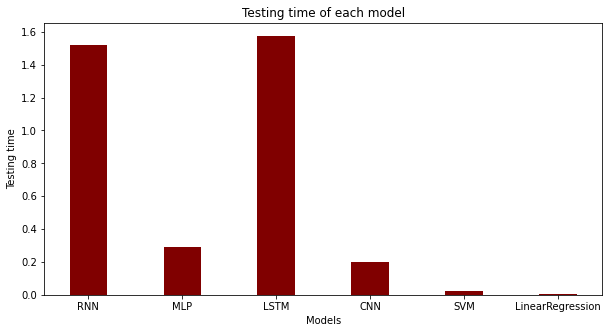

In [ ]:
data = {'RNN':rnn_testing_time,
        'MLP':mlp_testing_time,
        'LSTM':lstm_testing_time,
        'CNN':cnn_testing_time,
        'SVM': svm_testing_time,
        'LinearRegression': lr_testing_time}
models = list(data.keys())
training_times = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, training_times, color ='maroon', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Testing time")
plt.title("Testing time of each model")
plt.show()

Text(0.5, 1.0, 'LR')

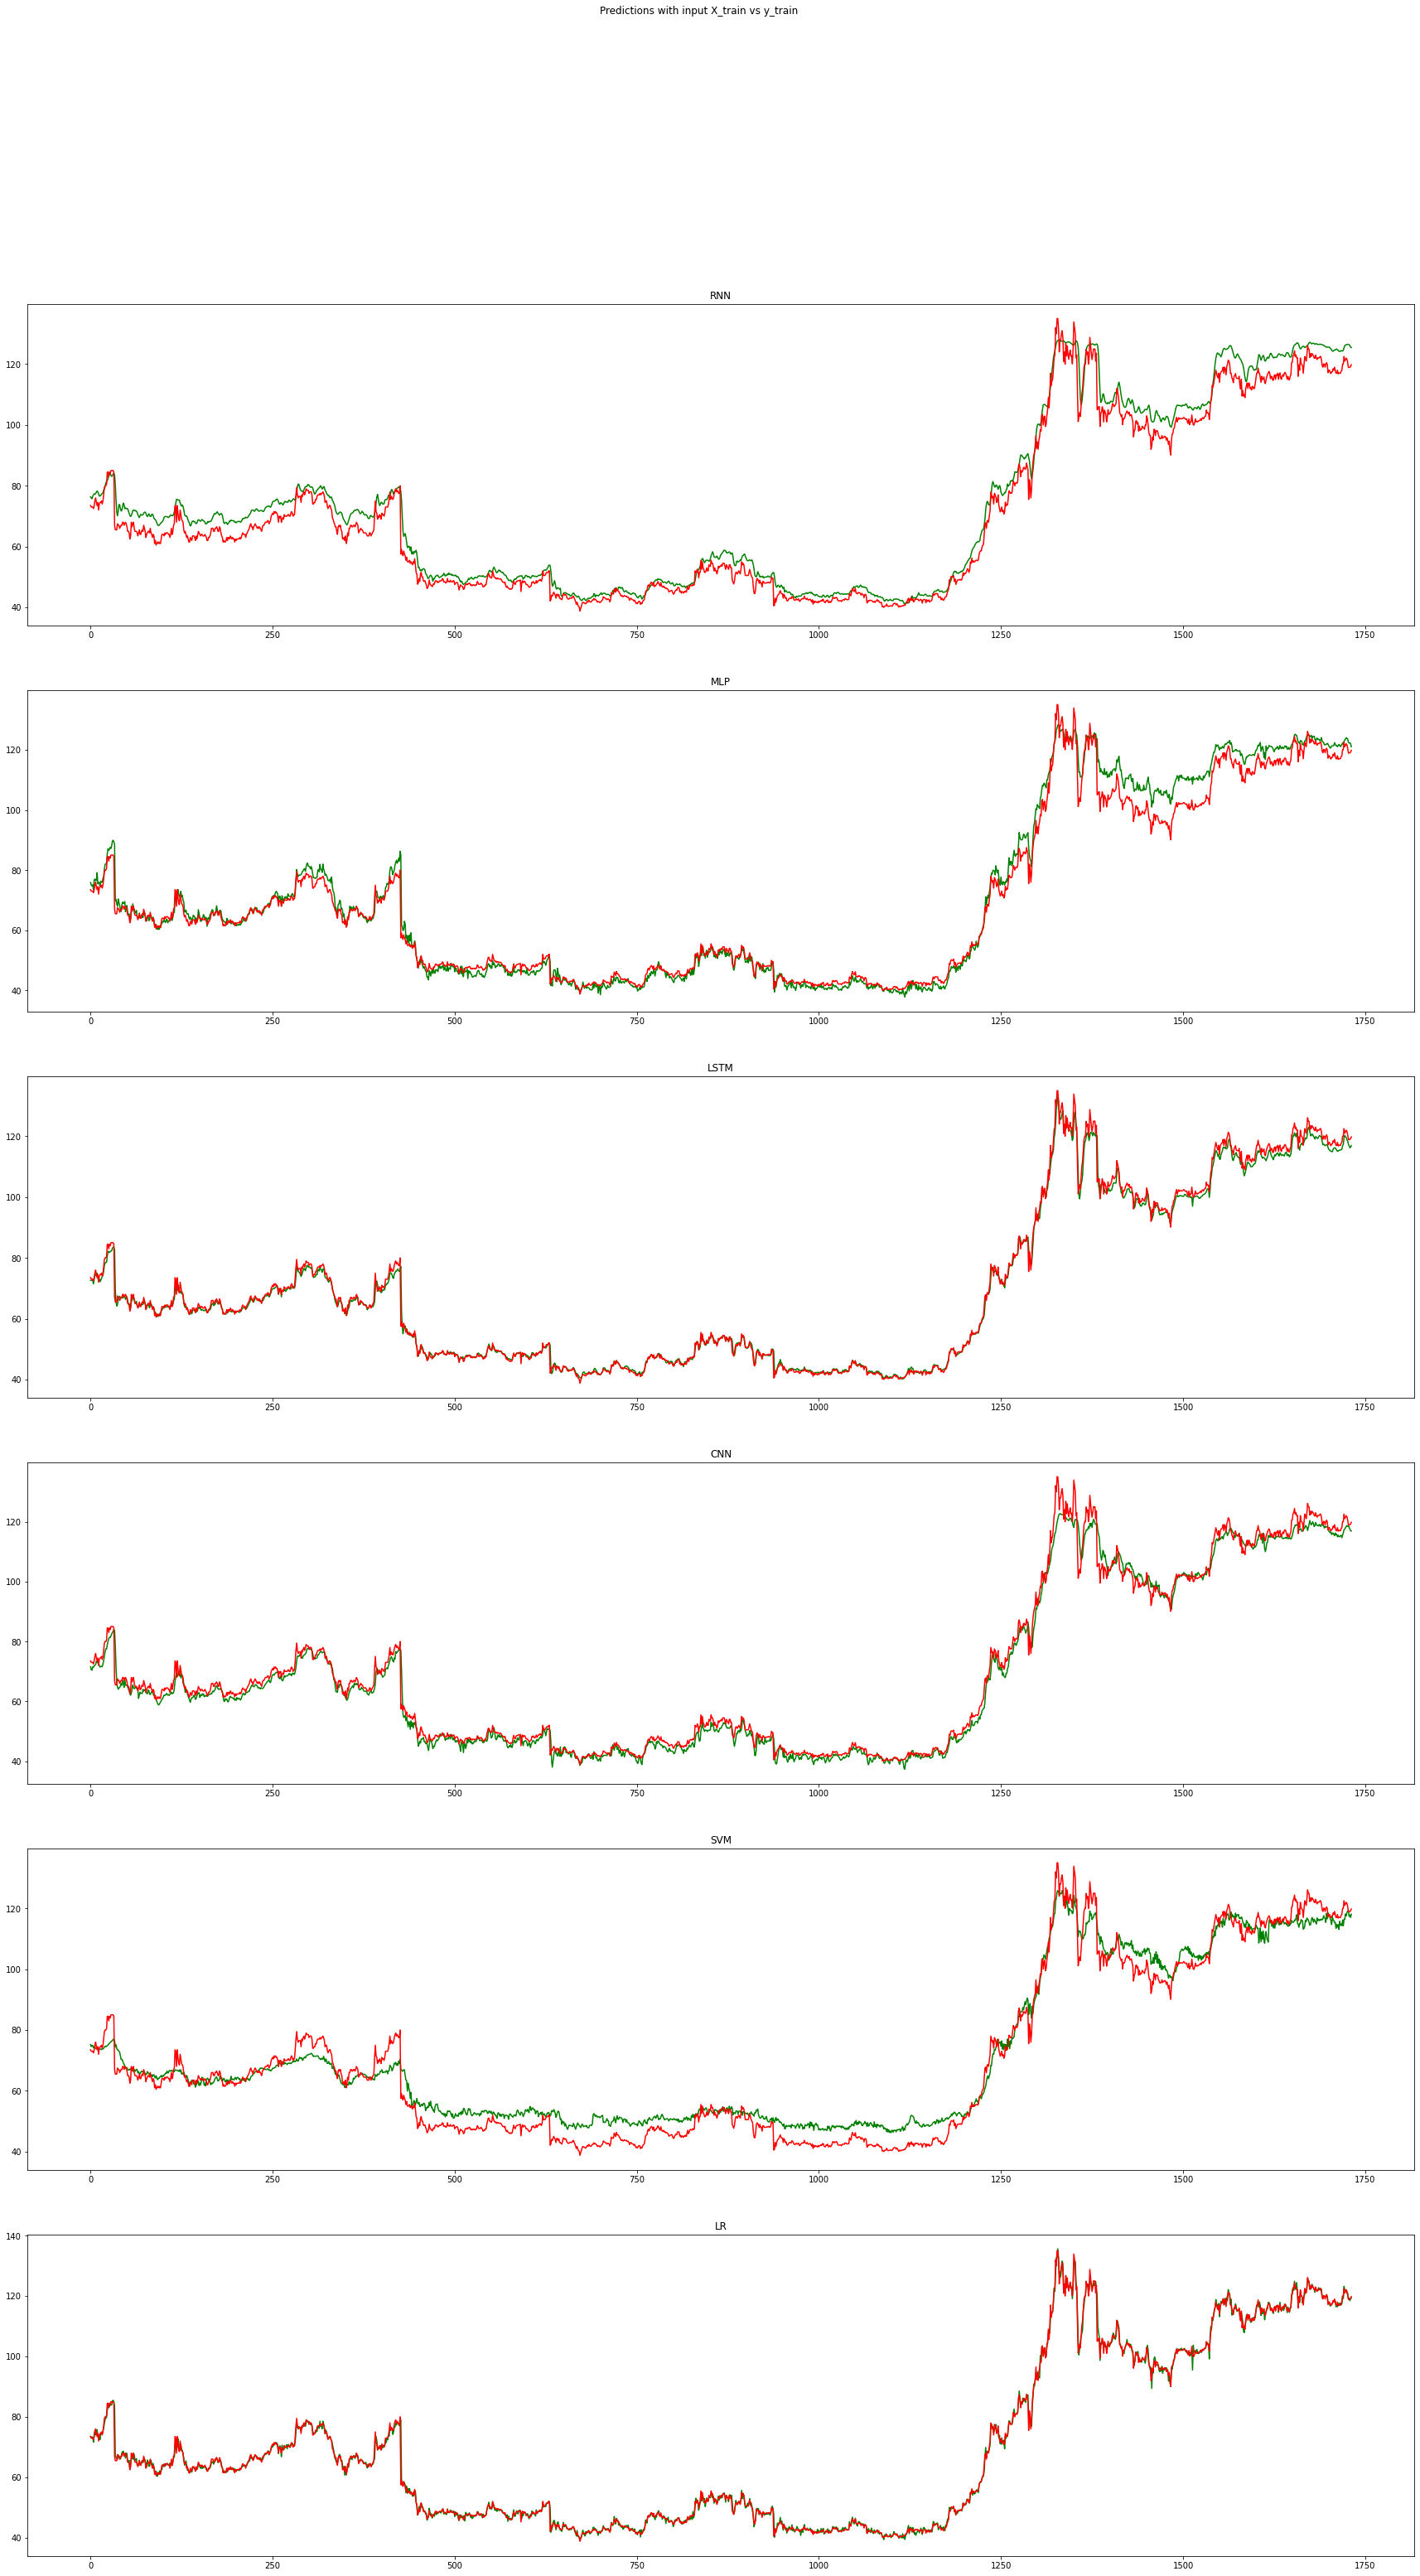

In [ ]:
# visualisation
fig, axs = plt.subplots(6, figsize=(30,50))
fig.suptitle('Predictions with input X_train vs y_train')
axs[0].plot(rnn_y_pred, color = "g", label = "RNN")
axs[0].plot(y_train, color = "r", label = "y_train")
axs[0].set_title('RNN')
axs[1].plot(mlp_y_pred, color = "g", label = "MLP")
axs[1].plot(y_train, color = "r", label = "y_train")
axs[1].set_title('MLP')
axs[2].plot(lstm_y_pred, color = "g", label = "LSTM")
axs[2].plot(y_train, color = "r", label = "y_train")
axs[2].set_title('LSTM')
axs[3].plot(cnn_y_pred, color = "g", label = "CNN")
axs[3].plot(y_train, color = "r", label = "y_train")
axs[3].set_title('CNN')
axs[4].plot(svm_y_pred, color = "g", label = "SVM")
axs[4].plot(y_train, color = "r", label = "y_train")
axs[4].set_title('SVM')
axs[5].plot(lr_y_pred, color = "g", label = "LR")
axs[5].plot(y_train, color = "r", label = "y_train")
axs[5].set_title('LR')

Test with testing dataset

In [38]:
dataset_validation = validation_data.iloc[:, 1:].values
scaled_dataset_validation =  scaler1.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (748, 8)


In [39]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i])
    y_test.append(dataset_validation[i][1])

y_test = np.reshape(y_test, (len(y_test),1))
y_test = scaler2.fit_transform(y_test)
y_test.shape
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [40]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (734, 14, 8)
Shape of y_test before reshape : (734, 1)


In [41]:
X_test_2d = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_test_2d.shape

(734, 112)

In [42]:
start_time = time.time()
rnn_y_pred_of_test = rnn.predict(X_test)  # predictions
rnn_y_pred_of_test = scaler2.inverse_transform(rnn_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
rnn_testing_time = end_time - start_time
rnn_y_pred_of_test.shape

(734, 1)

In [43]:
start_time = time.time()
mlp_y_pred_of_test = MLP.predict(X_test_2d)  # predictions
mlp_y_pred_of_test = scaler2.inverse_transform(mlp_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
mlp_testing_time = end_time - start_time
mlp_y_pred_of_test.shape

(734, 1)

In [44]:
start_time = time.time()
lstm_y_pred_of_test = lstm.predict(X_test)  # predictions
lstm_y_pred_of_test = scaler2.inverse_transform(lstm_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
lstm_testing_time = end_time - start_time
lstm_y_pred_of_test.shape

(734, 1)

In [45]:
start_time = time.time()
cnn_y_pred_of_test = cnn.predict(X_test)  # predictions
cnn_y_pred_of_test = scaler2.inverse_transform(cnn_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
cnn_testing_time = end_time - start_time
cnn_y_pred_of_test.shape

(734, 1)

In [46]:
start_time = time.time()
svm_y_pred_of_test = svm_m.predict(X_test_2d)  # predictions
svm_y_pred_of_test = np.reshape(svm_y_pred_of_test, (svm_y_pred_of_test.shape[0], 1))
svm_y_pred_of_test = scaler2.inverse_transform(svm_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
svm_testing_time = end_time - start_time
svm_y_pred_of_test.shape

(734, 1)

In [47]:
start_time = time.time()
lr_y_pred_of_test = lr.predict(X_test_2d)  # predictions
lr_y_pred_of_test = np.reshape(lr_y_pred_of_test, (lr_y_pred_of_test.shape[0], 1))
lr_y_pred_of_test = scaler2.inverse_transform(lr_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
lr_testing_time = end_time - start_time
lr_y_pred_of_test.shape

(734, 1)

In [48]:
y_test = scaler2.inverse_transform(y_test) # scaling back from 0-1 to original
y_test.shape

(734, 1)

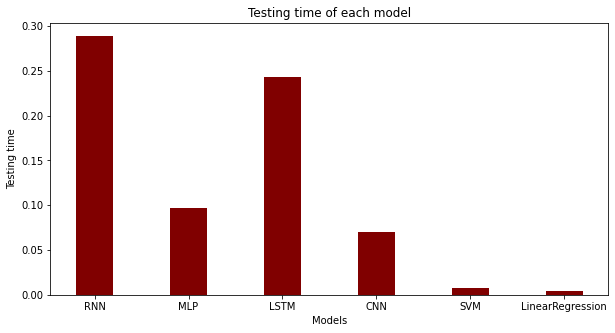

In [ ]:
data = {'RNN':rnn_testing_time,
        'MLP':mlp_testing_time,
        'LSTM':lstm_testing_time,
        'CNN':cnn_testing_time,
        'SVM': svm_testing_time,
        'LinearRegression': lr_testing_time}
models = list(data.keys())
training_times = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, training_times, color ='maroon', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Testing time")
plt.title("Testing time of each model")
plt.show()

Text(0.5, 1.0, 'LR')

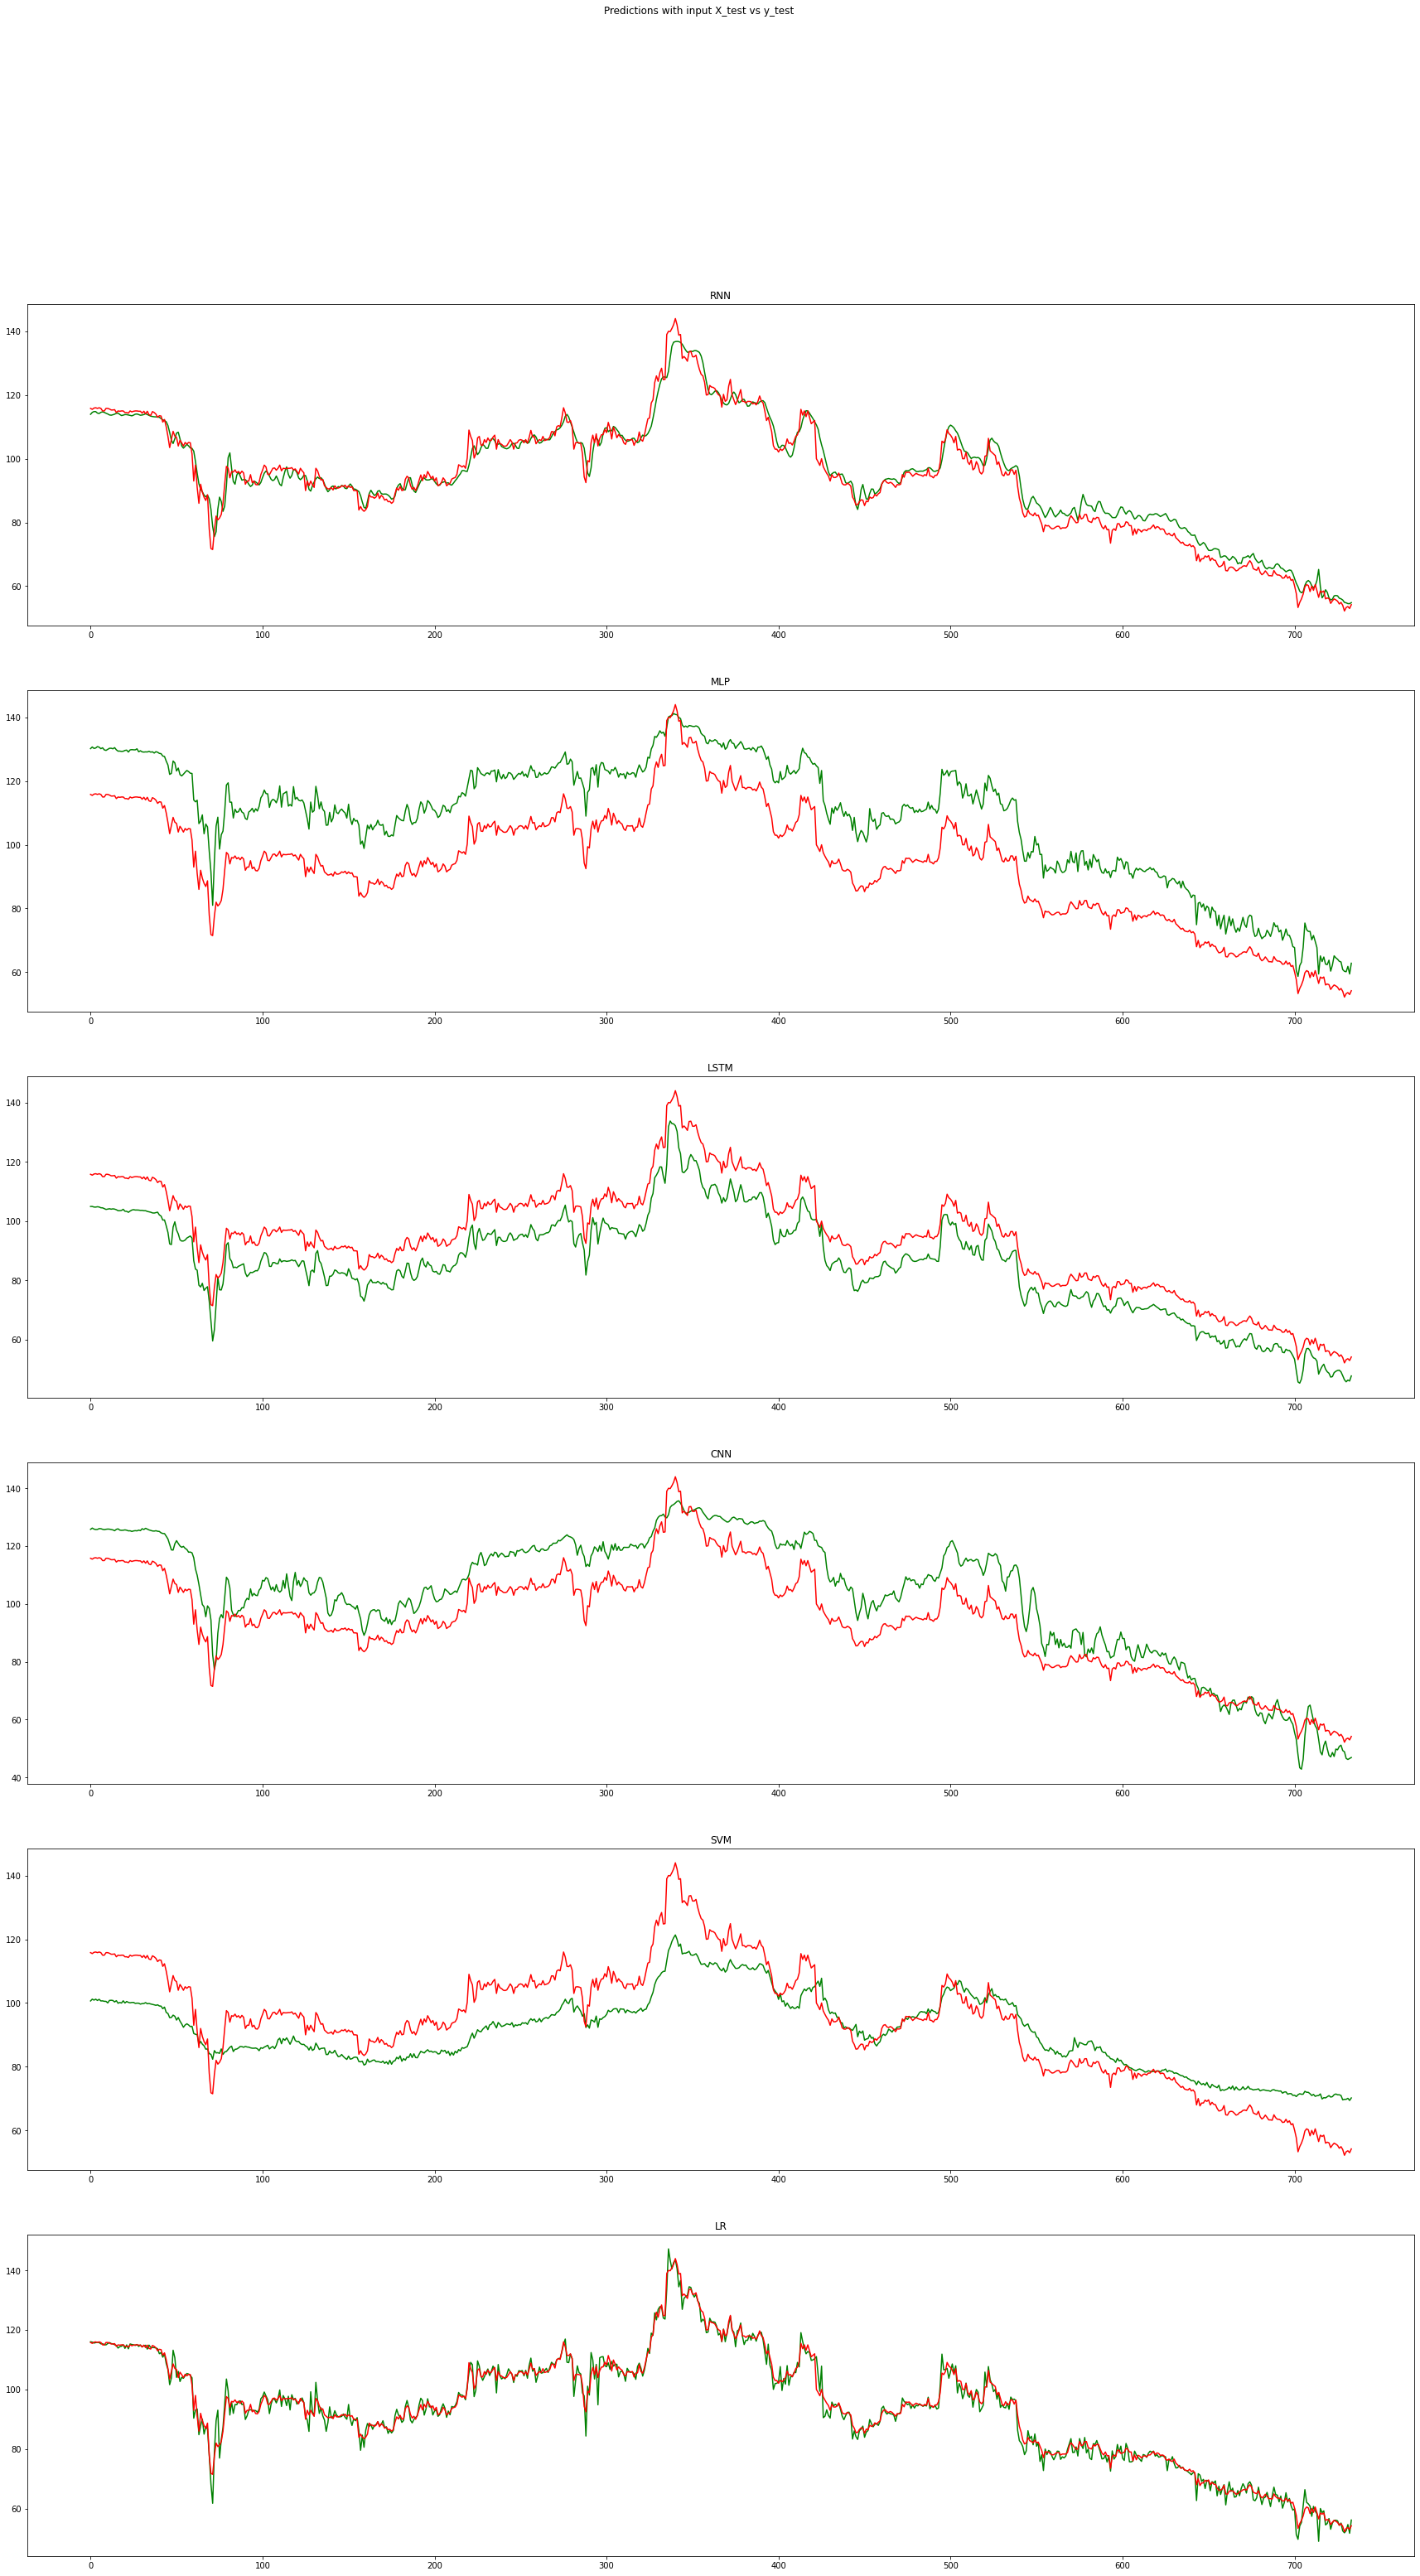

In [ ]:
# visualisation
fig, axs = plt.subplots(6, figsize=(30,50))
fig.suptitle('Predictions with input X_test vs y_test')
axs[0].plot(rnn_y_pred_of_test, color = "g", label = "RNN")
axs[0].plot(y_test, color = "r", label = "y_test")
axs[0].set_title('RNN')
axs[1].plot(mlp_y_pred_of_test, color = "g", label = "MLP")
axs[1].plot(y_test, color = "r", label = "y_test")
axs[1].set_title('MLP')
axs[2].plot(lstm_y_pred_of_test, color = "g", label = "LSTM")
axs[2].plot(y_test, color = "r", label = "y_test")
axs[2].set_title('LSTM')
axs[3].plot(cnn_y_pred_of_test, color = "g", label = "CNN")
axs[3].plot(y_test, color = "r", label = "y_test")
axs[3].set_title('CNN')
axs[4].plot(svm_y_pred_of_test, color = "g", label = "SVM")
axs[4].plot(y_test, color = "r", label = "y_test")
axs[4].set_title('SVM')
axs[5].plot(lr_y_pred_of_test, color = "g", label = "LR")
axs[5].plot(y_test, color = "r", label = "y_test")
axs[5].set_title('LR')

Check score

In [ ]:
#RNN
vr_rnn = explained_variance_score(rnn_y_pred_of_test, y_test)
r2_rnn = r2_score(rnn_y_pred_of_test, y_test)

#MLP
vr_mlp = explained_variance_score(mlp_y_pred_of_test, y_test)
r2_mlp = r2_score(mlp_y_pred_of_test, y_test)

#LSTM
vr_lstm = explained_variance_score(lstm_y_pred_of_test, y_test)
r2_lstm = r2_score(lstm_y_pred_of_test, y_test)

#CNN
vr_cnn = explained_variance_score(cnn_y_pred_of_test, y_test)
r2_cnn = r2_score(cnn_y_pred_of_test, y_test)

#SVM
vr_svm = explained_variance_score(svm_y_pred_of_test, y_test)
r2_svm = r2_score(svm_y_pred_of_test, y_test)

#LR
vr_lr = explained_variance_score(lr_y_pred_of_test, y_test)
r2_lr = r2_score(lr_y_pred_of_test, y_test)

In [ ]:
scores = pd.DataFrame([[vr_rnn, vr_mlp, vr_lstm, vr_cnn, vr_svm, vr_lr],
                  [r2_rnn, r2_mlp, r2_lstm, r2_cnn, r2_svm, r2_lr]],
                 index=['explained_variance_score', 'r2_score'],
                 columns=pd.Index(['RNN', 'MLP', 'LSTM', 'CNN', 'SVM', 'LR'], 
                 name='Algorithm')).round(2)
scores

Algorithm                  RNN   MLP  LSTM   CNN   SVM    LR
explained_variance_score  0.97  0.95  0.98  0.92  0.44  0.99
r2_score                  0.96  0.35  0.71  0.75  0.35  0.99

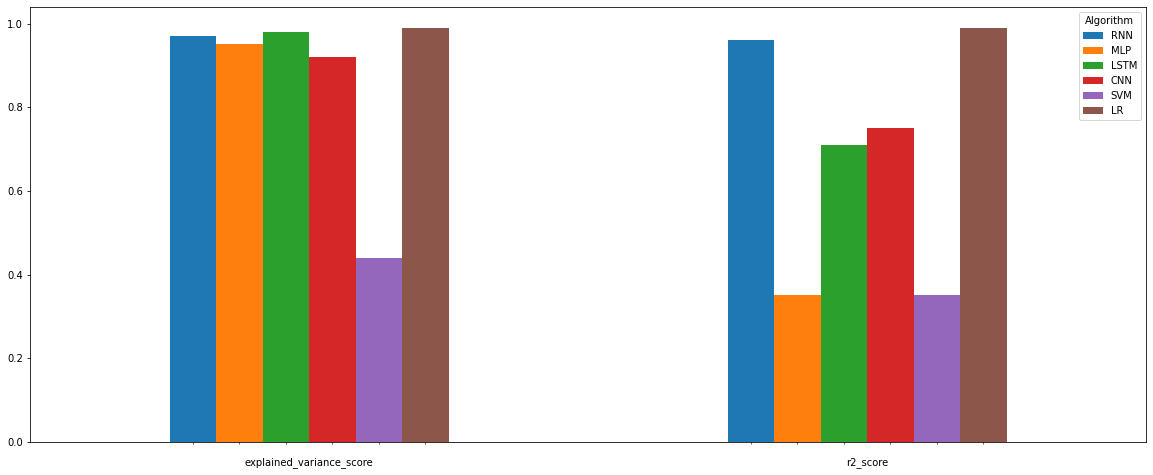

In [ ]:
scores.plot(kind='bar',figsize=(20,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)

ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = scores.columns.values[i//len(df.index.values)]
    lab.append(l)

# ax.set_xticklabels(lab,minor=True)
ax.tick_params(axis='x', which='major', pad=15, size=0)
plt.setp(ax.get_xticklabels(), rotation=0)

plt.show()

Predict for 14 days

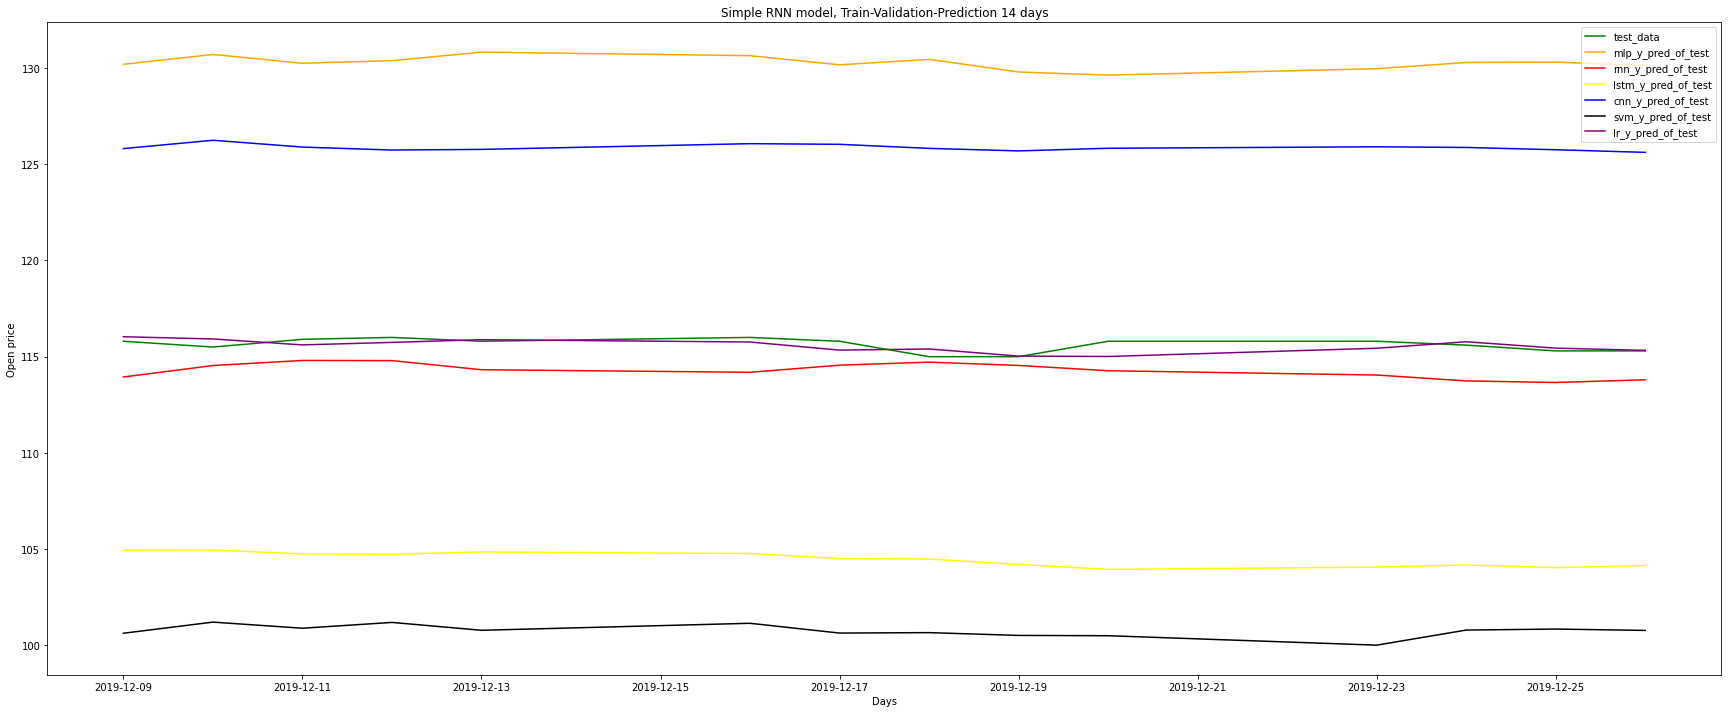

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(validation_data.Date.iloc[time_step:time_step+14], y_test[:14], label = "test_data", color = "g")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], mlp_y_pred_of_test[:14], label = "mlp_y_pred_of_test", color = "orange")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], rnn_y_pred_of_test[:14], label = "rnn_y_pred_of_test", color = "red")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], lstm_y_pred_of_test[:14], label = "lstm_y_pred_of_test", color = "yellow")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], cnn_y_pred_of_test[:14], label = "cnn_y_pred_of_test", color = "blue")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], svm_y_pred_of_test[:14], label = "svm_y_pred_of_test", color = "black")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], lr_y_pred_of_test[:14], label = "lr_y_pred_of_test", color = "purple")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple Each model, Train-Validation-Prediction 14 days")
plt.legend()
plt.show()

Predict for 7 weeks

In [ ]:
rnn_y_pred_of_week = np.add.reduceat(rnn_y_pred_of_test[:49], range(0, 48, 7))/7
mlp_y_pred_of_week = np.add.reduceat(mlp_y_pred_of_test[:49], range(0, 48, 7))/7
lstm_y_pred_of_week = np.add.reduceat(lstm_y_pred_of_test[:49], range(0, 48, 7))/7
cnn_y_pred_of_week = np.add.reduceat(cnn_y_pred_of_test[:49], range(0, 48, 7))/7
svm_y_pred_of_week = np.add.reduceat(svm_y_pred_of_test[:49], range(0, 48, 7))/7
lr_y_pred_of_week = np.add.reduceat(lr_y_pred_of_test[:49], range(0, 48, 7))/7
y_test_of_week = np.add.reduceat(y_test[:49], range(0, 48, 7))/7

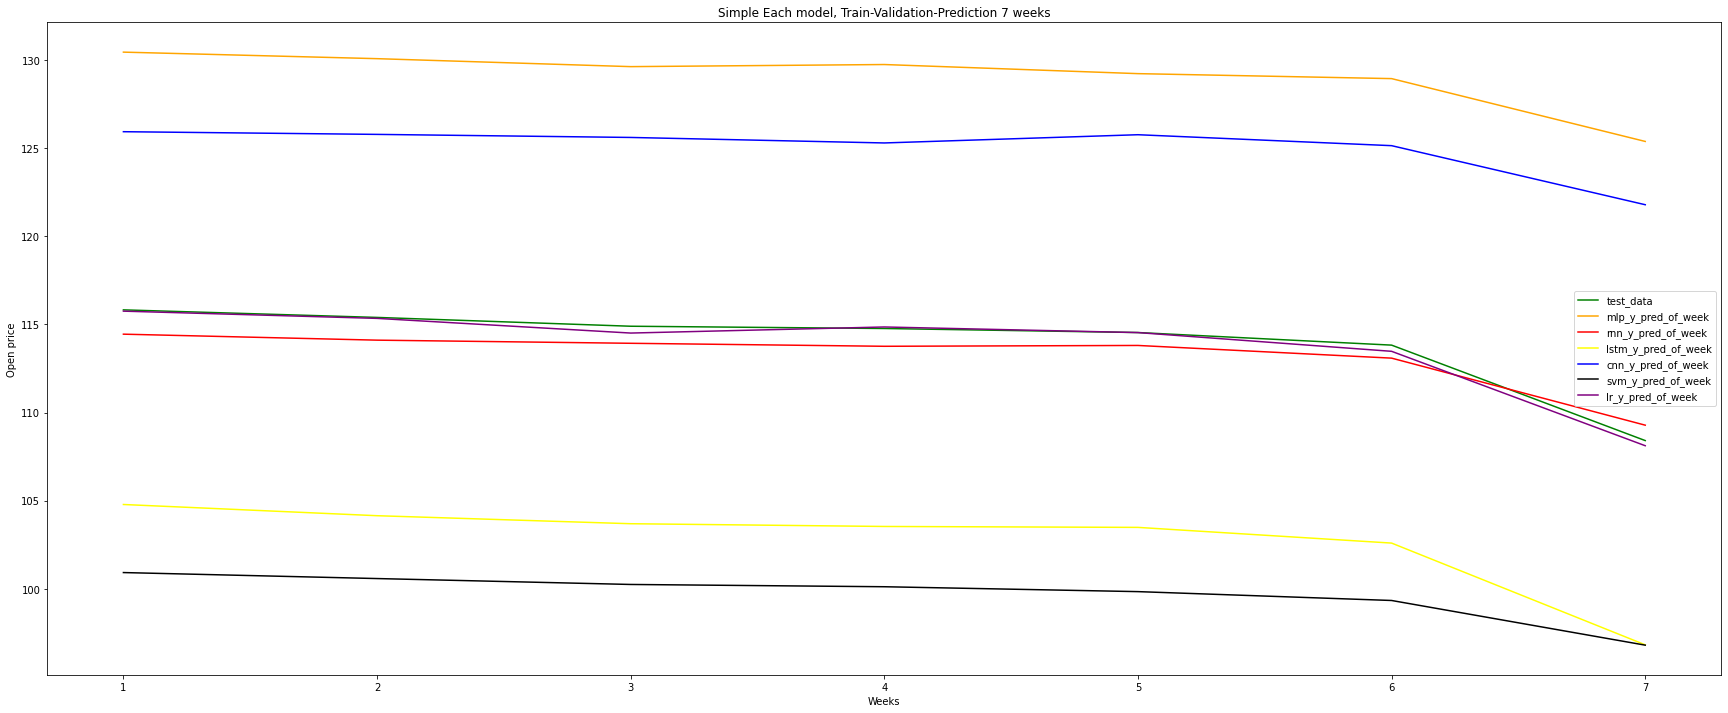

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot([i for i in range(1, 8)], y_test_of_week, label = "test_data", color = "g")
plt.plot([i for i in range(1, 8)], mlp_y_pred_of_week, label = "mlp_y_pred_of_week", color = "orange")
plt.plot([i for i in range(1, 8)], rnn_y_pred_of_week, label = "rnn_y_pred_of_week", color = "red")
plt.plot([i for i in range(1, 8)], lstm_y_pred_of_week, label = "lstm_y_pred_of_week", color = "yellow")
plt.plot([i for i in range(1, 8)], cnn_y_pred_of_week, label = "cnn_y_pred_of_week", color = "blue")
plt.plot([i for i in range(1, 8)], svm_y_pred_of_week, label = "svm_y_pred_of_week", color = "black")
plt.plot([i for i in range(1, 8)], lr_y_pred_of_week, label = "lr_y_pred_of_week", color = "purple")
plt.xlabel("Weeks")
plt.ylabel("Open price")
plt.title("Simple Each model, Train-Validation-Prediction 7 weeks")
plt.legend()
plt.show()

Handling Overfitting

RNN model

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(units = 200, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 200, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 200, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 200))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))
rnn.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

# Tạo Early Stopping để dừng training khi model đã đủ tốt tránh bị Overfitting
# đối số monitor='val_loss' có nghĩa là nó sẽ được dừng dựa trên giá trị loss validation. mode='min'
# có nghĩa là khi loss validation ngừng giảm dần
# patient=200 là số epoch không có sự cải thiện mà sau đó quá trình đào tạo sẽ bị dừng.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=75)
mc = ModelCheckpoint('models/RNN_model_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start_time = time.time()
rnn_history = rnn.fit(X_train, y_train, validation_split=0.2, epochs = 1000, batch_size = 32, callbacks=[es, mc])
end_time = time.time()
rnn_training_time = end_time - start_time

Epoch 1/1000
43/44 [============================>.] - ETA: 0s - loss: 0.6715 - accuracy: 0.0015
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to models\RNN_model_2.h5
44/44 [==============================] - 3s 31ms/step - loss: 0.6693 - accuracy: 0.0014 - val_loss: 0.0426 - val_accuracy: 0.0000e+00
Epoch 2/1000
43/44 [============================>.] - ETA: 0s - loss: 0.3609 - accuracy: 0.0022
Epoch 00002: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 24ms/step - loss: 0.3603 - accuracy: 0.0022 - val_loss: 0.2874 - val_accuracy: 0.0000e+00
Epoch 3/1000
43/44 [============================>.] - ETA: 0s - loss: 0.3244 - accuracy: 0.0015    
Epoch 00003: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 24ms/step - loss: 0.3246 - accuracy: 0.0014 - val_loss: 0.1468 - val_accuracy: 0.0000e+00
Epoch 4/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.3013 - accuracy: 7.4405e-04
E

Epoch 30/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0126 - accuracy: 0.0022
Epoch 00030: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 25ms/step - loss: 0.0125 - accuracy: 0.0022 - val_loss: 0.0614 - val_accuracy: 0.0000e+00
Epoch 31/1000
44/44 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.0022
Epoch 00031: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 26ms/step - loss: 0.0118 - accuracy: 0.0022 - val_loss: 0.0419 - val_accuracy: 0.0000e+00
Epoch 32/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.0022
Epoch 00032: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 27ms/step - loss: 0.0098 - accuracy: 0.0022 - val_loss: 0.0305 - val_accuracy: 0.0000e+00
Epoch 33/1000
44/44 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.0022
Epoch 00033: val_accuracy did not improve fro

Epoch 59/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0026 - accuracy: 0.0022
Epoch 00059: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 26ms/step - loss: 0.0026 - accuracy: 0.0022 - val_loss: 0.0221 - val_accuracy: 0.0000e+00
Epoch 60/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0029 - accuracy: 0.0022
Epoch 00060: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 27ms/step - loss: 0.0029 - accuracy: 0.0022 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 61/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.0022
Epoch 00061: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 26ms/step - loss: 0.0022 - accuracy: 0.0022 - val_loss: 0.0268 - val_accuracy: 0.0000e+00
Epoch 62/1000
44/44 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.0022
Epoch 00062: val_accuracy did not improve fro

Epoch 88/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 0.0022
Epoch 00088: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 27ms/step - loss: 0.0021 - accuracy: 0.0022 - val_loss: 0.0261 - val_accuracy: 0.0000e+00
Epoch 00088: early stopping


MLP model

In [ ]:
X_train_2d = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_train_2d.shape

(1732, 112)

In [ ]:
MLP = Sequential()
MLP.add(Reshape((X_train_2d.shape[1],), input_shape = (X_train_2d.shape[1],1)))
MLP.add(Dense(512, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(256, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(128, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(64, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(32, activation='tanh'))
MLP.add(Dropout(0.2))
MLP.add(Dense(1))
MLP.compile(optimizer = 'Adam', loss = "mean_squared_error",  metrics = ["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('models/MLP_model_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start_time = time.time()
mlp_history = MLP.fit(X_train_2d, y_train, validation_split=0.2, epochs = 1000, batch_size = 32, callbacks=[es, mc])
end_time = time.time()
mlp_training_time = end_time - start_time

Epoch 1/1000
28/44 [==================>...........] - ETA: 0s - loss: 0.6426 - accuracy: 0.0011     
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to models\MLP_model_2.h5
44/44 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.0014 - val_loss: 0.0266 - val_accuracy: 0.0000e+00
Epoch 2/1000
25/44 [================>.............] - ETA: 0s - loss: 0.2854 - accuracy: 0.0025    
Epoch 00002: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.0022 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 3/1000
26/44 [================>.............] - ETA: 0s - loss: 0.1798 - accuracy: 0.0024    
Epoch 00003: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.0014 - val_loss: 0.1155 - val_accuracy: 0.0000e+00
Epoch 4/1000
27/44 [=================>............] - ETA: 0s - loss: 0.1242 - accuracy: 0.0023

Epoch 58/1000
23/44 [==============>...............] - ETA: 0s - loss: 0.0052 - accuracy: 0.0027
Epoch 00058: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0022 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 59/1000
25/44 [================>.............] - ETA: 0s - loss: 0.0038 - accuracy: 0.0037
Epoch 00059: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.0022 - val_loss: 7.5380e-04 - val_accuracy: 0.0000e+00
Epoch 60/1000
25/44 [================>.............] - ETA: 0s - loss: 0.0045 - accuracy: 0.0037    
Epoch 00060: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.0022 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 61/1000
25/44 [================>.............] - ETA: 0s - loss: 0.0034 - accuracy: 0.0025    
Epoch 00061: val_accuracy did not im

Epoch 87/1000
25/44 [================>.............] - ETA: 0s - loss: 0.0028 - accuracy: 0.0025    
Epoch 00087: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.0022 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 88/1000
28/44 [==================>...........] - ETA: 0s - loss: 0.0028 - accuracy: 0.0011    
Epoch 00088: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0022 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 89/1000
27/44 [=================>............] - ETA: 0s - loss: 0.0038 - accuracy: 0.0035    
Epoch 00089: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0022 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 90/1000
24/44 [===============>..............] - ETA: 0s - loss: 0.0029 - accuracy: 0.0026
Epoch 00090: val_accuracy did not im

LSTM model

In [ ]:
lstm = Sequential()
lstm.add(LSTM(100,return_sequences=True,input_shape = (X_train.shape[1],8)))
lstm.add(LSTM(100, return_sequences= False))
lstm.add(Dense(64))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('models/LSTM_model_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start_time = time.time()
lstm_history = lstm.fit(X_train, y_train, validation_split=0.2, epochs = 1000, batch_size = 32, callbacks=[es, mc])
end_time = time.time()
lstm_training_time = end_time - start_time

Epoch 1/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0100 - accuracy: 0.0023
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to models\LSTM_model_2.h5
44/44 [==============================] - 3s 23ms/step - loss: 0.0094 - accuracy: 0.0022 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 2/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0014 - accuracy: 0.0023
Epoch 00002: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 12ms/step - loss: 0.0013 - accuracy: 0.0022 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 3/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.0023
Epoch 00003: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 12ms/step - loss: 0.0014 - accuracy: 0.0022 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 4/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0014 - accuracy: 0.0023
Epoch 00

Epoch 29/1000
40/44 [==========================>...] - ETA: 0s - loss: 3.2205e-04 - accuracy: 0.0023
Epoch 00029: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 13ms/step - loss: 3.0825e-04 - accuracy: 0.0022 - val_loss: 3.4934e-04 - val_accuracy: 0.0000e+00
Epoch 30/1000
40/44 [==========================>...] - ETA: 0s - loss: 2.3177e-04 - accuracy: 0.0023
Epoch 00030: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 12ms/step - loss: 2.2750e-04 - accuracy: 0.0022 - val_loss: 5.8791e-04 - val_accuracy: 0.0000e+00
Epoch 31/1000
40/44 [==========================>...] - ETA: 0s - loss: 2.4091e-04 - accuracy: 0.0016    
Epoch 00031: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 13ms/step - loss: 2.2721e-04 - accuracy: 0.0022 - val_loss: 3.1088e-04 - val_accuracy: 0.0000e+00
Epoch 32/1000
41/44 [==========================>...] - ETA: 0s - loss: 2.8391e-04 - accuracy: 0.0023
E

Epoch 57/1000
41/44 [==========================>...] - ETA: 0s - loss: 2.2770e-04 - accuracy: 0.0023
Epoch 00057: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 13ms/step - loss: 2.1887e-04 - accuracy: 0.0022 - val_loss: 3.5914e-04 - val_accuracy: 0.0000e+00
Epoch 58/1000
43/44 [============================>.] - ETA: 0s - loss: 2.0670e-04 - accuracy: 0.0022
Epoch 00058: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 13ms/step - loss: 2.0548e-04 - accuracy: 0.0022 - val_loss: 5.3385e-04 - val_accuracy: 0.0000e+00
Epoch 59/1000
41/44 [==========================>...] - ETA: 0s - loss: 1.6451e-04 - accuracy: 0.0023
Epoch 00059: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 12ms/step - loss: 1.8401e-04 - accuracy: 0.0022 - val_loss: 3.9551e-04 - val_accuracy: 0.0000e+00
Epoch 60/1000
44/44 [==============================] - ETA: 0s - loss: 2.4555e-04 - accuracy: 0.0022
Epoch

Epoch 85/1000
41/44 [==========================>...] - ETA: 0s - loss: 2.9451e-04 - accuracy: 0.0023
Epoch 00085: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 13ms/step - loss: 2.8895e-04 - accuracy: 0.0022 - val_loss: 3.6659e-04 - val_accuracy: 0.0000e+00
Epoch 86/1000
41/44 [==========================>...] - ETA: 0s - loss: 1.8844e-04 - accuracy: 0.0023
Epoch 00086: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 12ms/step - loss: 1.8370e-04 - accuracy: 0.0022 - val_loss: 3.4347e-04 - val_accuracy: 0.0000e+00
Epoch 87/1000
41/44 [==========================>...] - ETA: 0s - loss: 2.0195e-04 - accuracy: 0.0015
Epoch 00087: val_accuracy did not improve from 0.00000
44/44 [==============================] - 1s 12ms/step - loss: 1.9756e-04 - accuracy: 0.0022 - val_loss: 4.5454e-04 - val_accuracy: 0.0000e+00
Epoch 88/1000
41/44 [==========================>...] - ETA: 0s - loss: 2.2864e-04 - accuracy: 0.0023
Epoch

CNN model

In [ ]:
cnn = Sequential()
cnn.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
cnn.add(Conv1D(10, kernel_size=(10), activation="tanh"))
cnn.add(Conv1D(10, kernel_size=(3), activation="tanh")),
cnn.add(MaxPool1D(pool_size=(1))),
cnn.add(Conv1D(10, kernel_size=(3), activation="tanh")),
cnn.add(MaxPool1D(pool_size=(1))),
cnn.add(Flatten()),
cnn.add(Dropout(0.1)),
cnn.add(Dense(1, activation="tanh"))
cnn.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('models/CNN_model_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start_time = time.time()
cnn_history = cnn.fit(X_train, y_train, validation_split=0.2, epochs = 1000, batch_size = 32, callbacks=[es, mc])
end_time = time.time()
cnn_training_time = end_time - start_time

Epoch 1/1000
 1/44 [..............................] - ETA: 12s - loss: 0.0356 - accuracy: 0.0000e+00
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to models\CNN_model_2.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.0022 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 2/1000
 1/44 [..............................] - ETA: 0s - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 00002: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.0022 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 3/1000
 1/44 [..............................] - ETA: 0s - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 00003: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.0022 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 4/1000
 1/44 [..............................] - ETA: 0s - loss: 0.0058 - accuracy: 0.0000

 1/44 [..............................] - ETA: 0s - loss: 4.0689e-04 - accuracy: 0.0000e+00
Epoch 00057: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0022 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 58/1000
 1/44 [..............................] - ETA: 0s - loss: 6.4826e-04 - accuracy: 0.0000e+00
Epoch 00058: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0022 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 59/1000
 1/44 [..............................] - ETA: 0s - loss: 3.8584e-04 - accuracy: 0.0000e+00
Epoch 00059: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 1ms/step - loss: 9.1418e-04 - accuracy: 0.0022 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 60/1000
 1/44 [..............................] - ETA: 0s - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 00060: val_accuracy did 

Epoch 85/1000
 1/44 [..............................] - ETA: 0s - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 00085: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 1ms/step - loss: 7.5504e-04 - accuracy: 0.0022 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 86/1000
 1/44 [..............................] - ETA: 0s - loss: 2.2591e-04 - accuracy: 0.0000e+00
Epoch 00086: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 1ms/step - loss: 7.6826e-04 - accuracy: 0.0022 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 87/1000
 1/44 [..............................] - ETA: 0s - loss: 5.1672e-04 - accuracy: 0.0000e+00
Epoch 00087: val_accuracy did not improve from 0.00000
44/44 [==============================] - 0s 1ms/step - loss: 8.2901e-04 - accuracy: 0.0022 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 88/1000
 1/44 [..............................] - ETA: 0s - loss: 0.0012 - accuracy: 0.0312
Epoch 00088: val

SVM model

In [ ]:
start_time = time.time()
svm_m = svm.SVR(kernel='rbf')
svm_m.fit(X_train_2d, np.reshape(y_train, (-1)))
pickle.dump(svm_m, open("models/SVM_model.h5", 'wb'))
end_time = time.time()
svm_training_time = end_time - start_time

Linear Regression model

In [ ]:
start_time = time.time()
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_2d, np.reshape(y_train, (-1)))
pickle.dump(lr, open("models/LR_model.h5", 'wb'))
end_time = time.time()
lr_training_time = end_time - start_time

Compare Training time

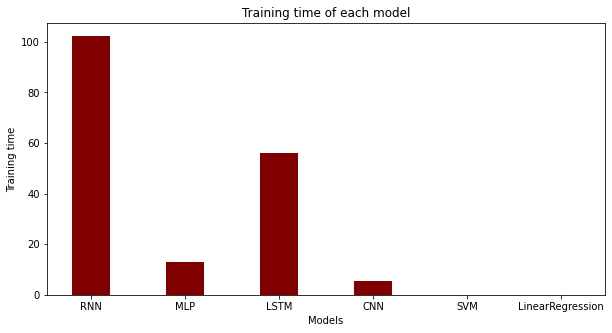

In [ ]:
# creating the dataset
data = {'RNN':rnn_training_time,
        'MLP':mlp_training_time,
        'LSTM':lstm_training_time,
        'CNN':cnn_training_time,
        'SVM': svm_training_time,
        'LinearRegression': lr_training_time}
models = list(data.keys())
training_times = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, training_times, color ='maroon', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Training time")
plt.title("Training time of each model")
plt.show()

Test with training dataset

In [ ]:
start_time = time.time()
rnn_y_pred = rnn.predict(X_train)  # predictions
rnn_y_pred = scaler2.inverse_transform(rnn_y_pred) # scaling back from 0-1 to original
end_time = time.time()
rnn_testing_time = end_time - start_time
rnn_y_pred.shape

(1732, 1)

In [ ]:
start_time = time.time()
mlp_y_pred = MLP.predict(X_train_2d)  # predictions
mlp_y_pred = scaler2.inverse_transform(mlp_y_pred) # scaling back from 0-1 to original
end_time = time.time()
mlp_testing_time = end_time - start_time
mlp_y_pred.shape

(1732, 1)

In [ ]:
start_time = time.time()
lstm_y_pred = lstm.predict(X_train)  # predictions
lstm_y_pred = scaler2.inverse_transform(lstm_y_pred) # scaling back from 0-1 to original
end_time = time.time()
lstm_testing_time = end_time - start_time
lstm_y_pred.shape

(1732, 1)

In [ ]:
start_time = time.time()
cnn_y_pred = cnn.predict(X_train)  # predictions
cnn_y_pred = scaler2.inverse_transform(cnn_y_pred) # scaling back from 0-1 to original
end_time = time.time()
cnn_testing_time = end_time - start_time
cnn_y_pred.shape

(1732, 1)

In [ ]:
start_time = time.time()
svm_y_pred = svm_m.predict(X_train_2d)  # predictions
svm_y_pred = np.reshape(svm_y_pred, (svm_y_pred.shape[0], 1))
svm_y_pred = scaler2.inverse_transform(svm_y_pred) # scaling back from 0-1 to original
end_time = time.time()
svm_testing_time = end_time - start_time
svm_y_pred.shape

(1732, 1)

In [ ]:
start_time = time.time()
lr_y_pred = lr.predict(X_train_2d)  # predictions
lr_y_pred = np.reshape(lr_y_pred, (lr_y_pred.shape[0], 1))
lr_y_pred = scaler2.inverse_transform(lr_y_pred) # scaling back from 0-1 to original
end_time = time.time()
lr_testing_time = end_time - start_time
lr_y_pred.shape

(1732, 1)

In [ ]:
y_train = scaler2.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1732, 1)

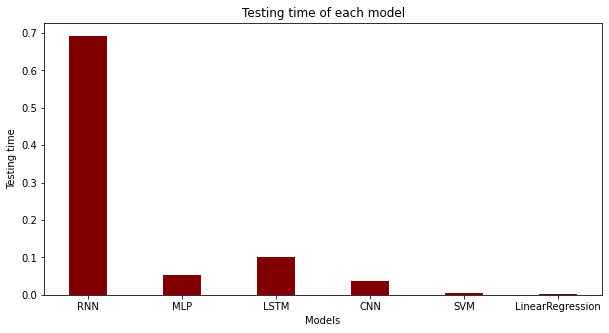

In [ ]:
data = {'RNN':rnn_testing_time,
        'MLP':mlp_testing_time,
        'LSTM':lstm_testing_time,
        'CNN':cnn_testing_time,
        'SVM': svm_testing_time,
        'LinearRegression': lr_testing_time}
models = list(data.keys())
training_times = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, training_times, color ='maroon', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Testing time")
plt.title("Testing time of each model")
plt.show()

Text(0.5, 1.0, 'LR')

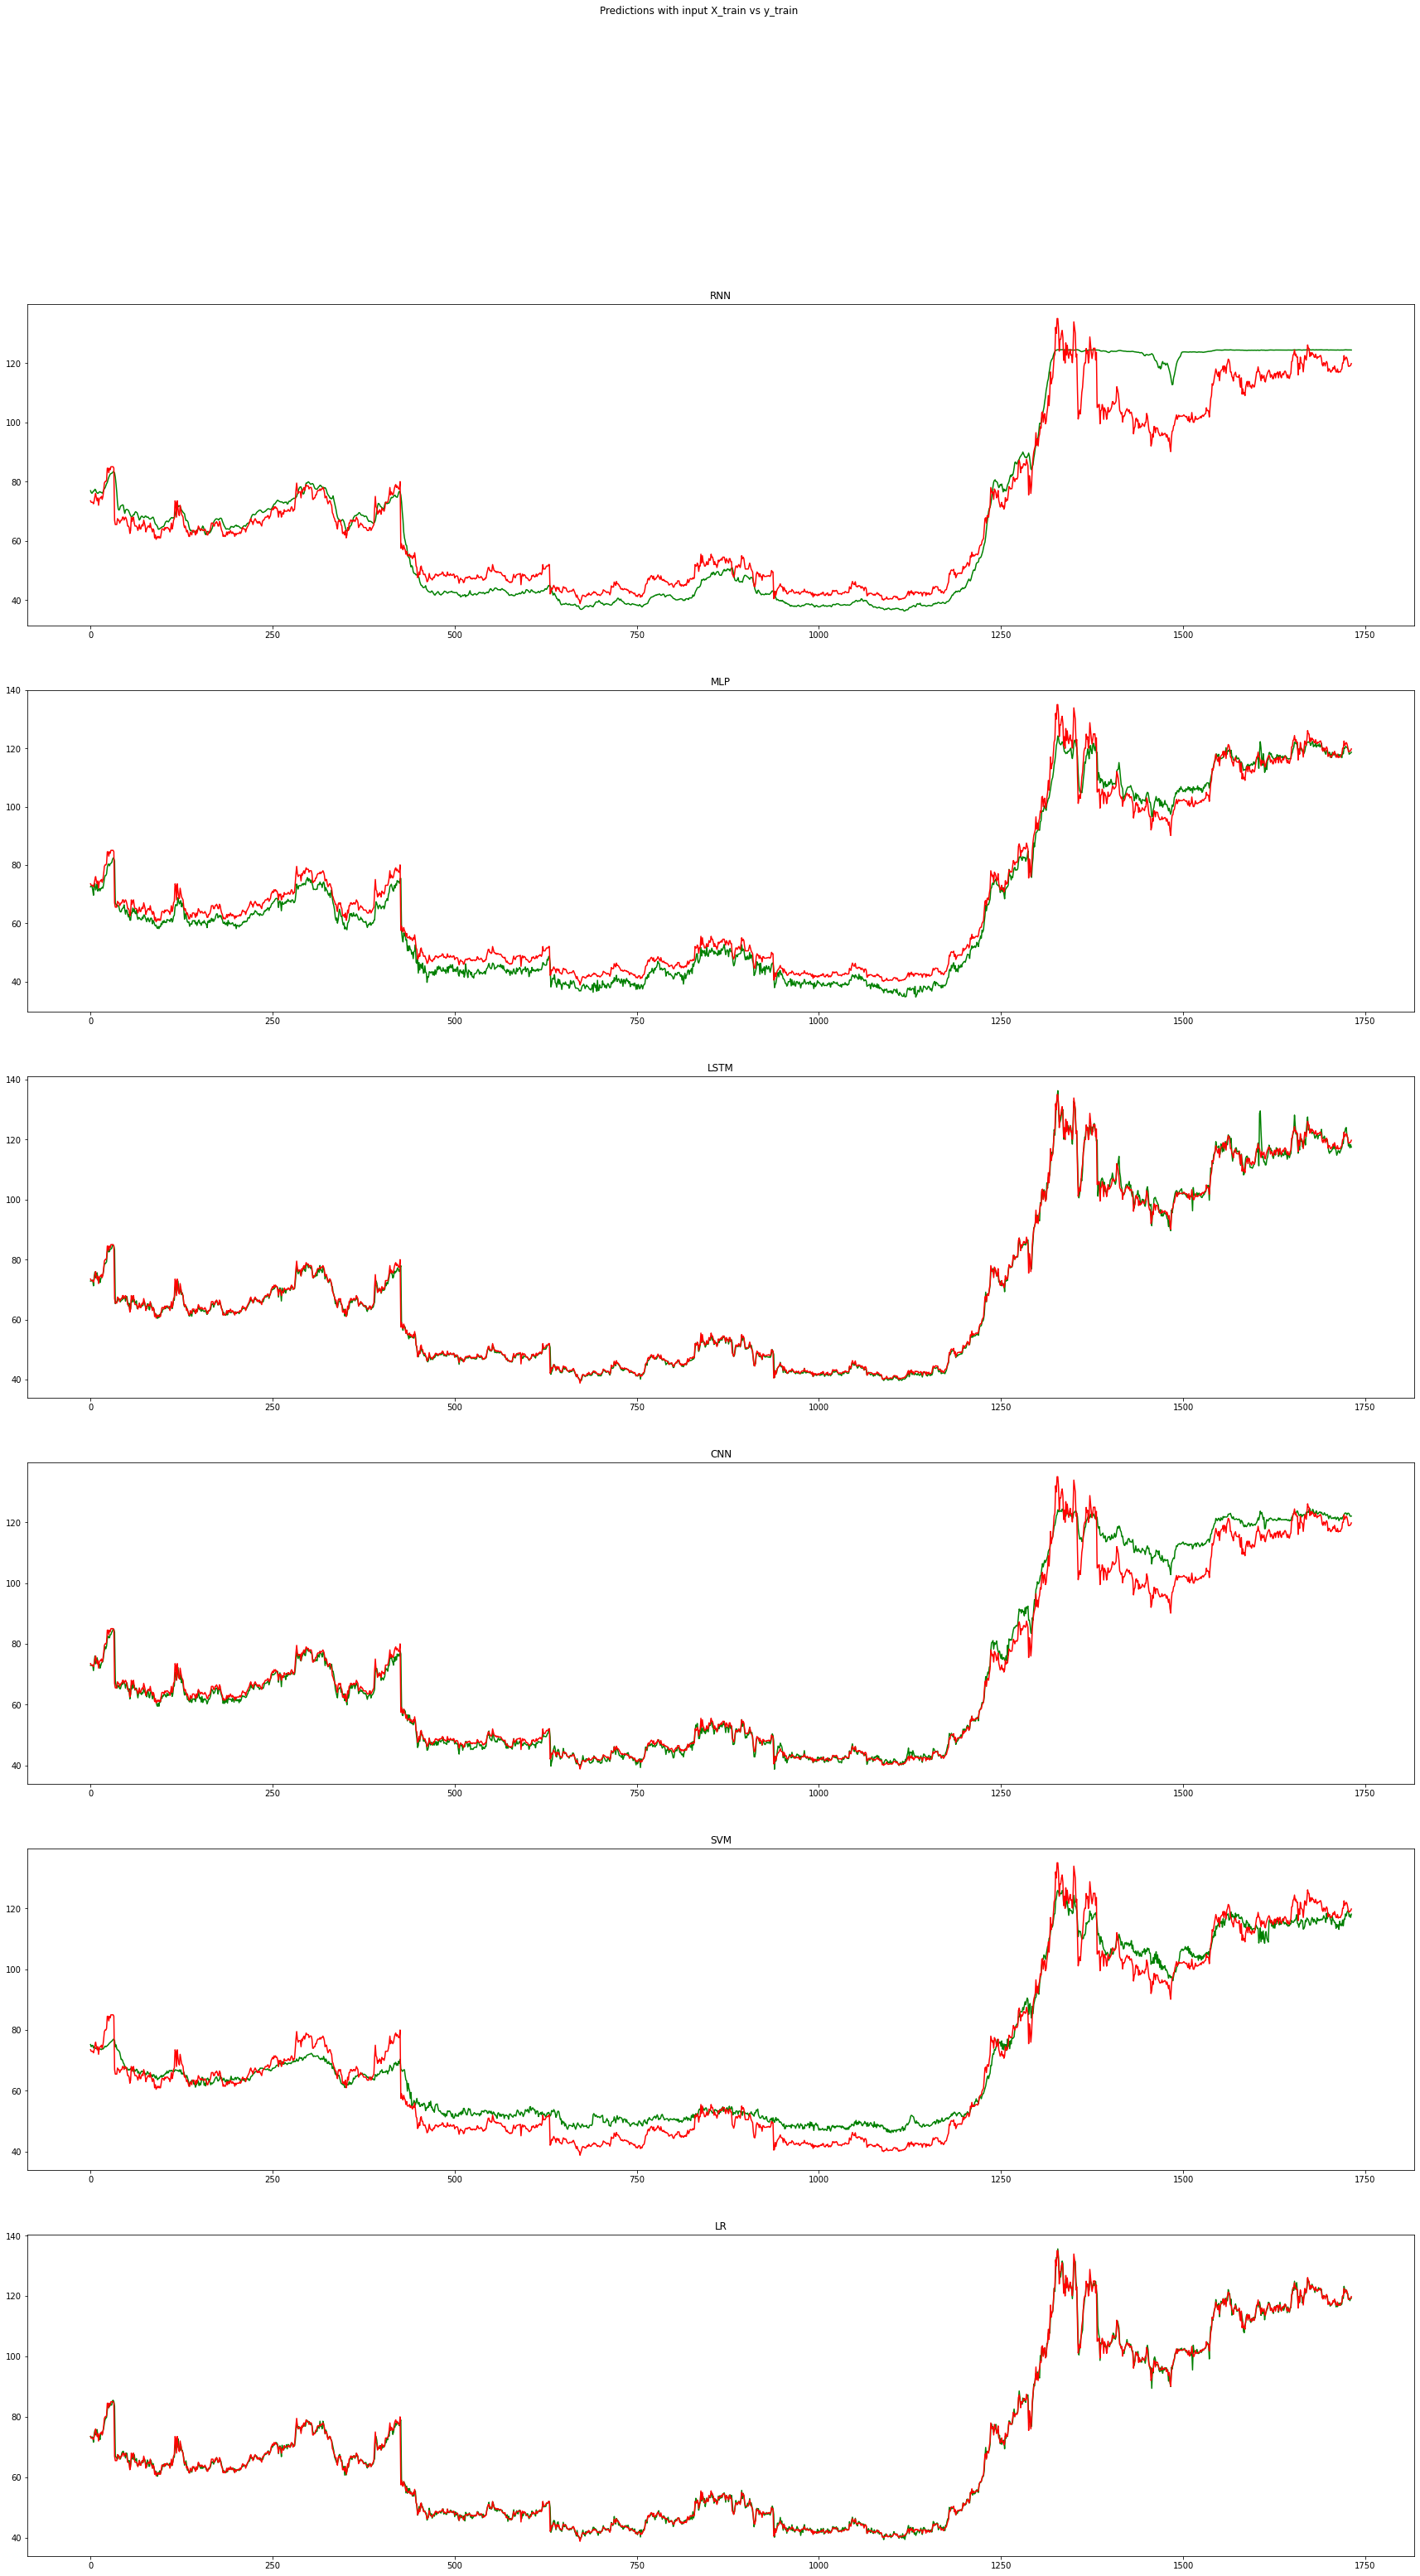

In [ ]:
# visualisation
fig, axs = plt.subplots(6, figsize=(30,50))
fig.suptitle('Predictions with input X_train vs y_train')
axs[0].plot(rnn_y_pred, color = "g", label = "RNN")
axs[0].plot(y_train, color = "r", label = "y_train")
axs[0].set_title('RNN')
axs[1].plot(mlp_y_pred, color = "g", label = "MLP")
axs[1].plot(y_train, color = "r", label = "y_train")
axs[1].set_title('MLP')
axs[2].plot(lstm_y_pred, color = "g", label = "LSTM")
axs[2].plot(y_train, color = "r", label = "y_train")
axs[2].set_title('LSTM')
axs[3].plot(cnn_y_pred, color = "g", label = "CNN")
axs[3].plot(y_train, color = "r", label = "y_train")
axs[3].set_title('CNN')
axs[4].plot(svm_y_pred, color = "g", label = "SVM")
axs[4].plot(y_train, color = "r", label = "y_train")
axs[4].set_title('SVM')
axs[5].plot(lr_y_pred, color = "g", label = "LR")
axs[5].plot(y_train, color = "r", label = "y_train")
axs[5].set_title('LR')

Test with testing dataset

In [ ]:
dataset_validation = validation_data.iloc[:, 1:].values
scaled_dataset_validation =  scaler1.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (748, 8)


In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i])
    y_test.append(dataset_validation[i][1])

y_test = np.reshape(y_test, (len(y_test),1))
y_test = scaler2.fit_transform(y_test)
y_test.shape
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (734, 14, 8)
Shape of y_test before reshape : (734, 1)


In [ ]:
X_test_2d = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_test_2d.shape

(734, 112)

In [ ]:
start_time = time.time()
rnn_y_pred_of_test = rnn.predict(X_test)  # predictions
rnn_y_pred_of_test = scaler2.inverse_transform(rnn_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
rnn_testing_time = end_time - start_time
rnn_y_pred_of_test.shape

(734, 1)

In [ ]:
start_time = time.time()
mlp_y_pred_of_test = MLP.predict(X_test_2d)  # predictions
mlp_y_pred_of_test = scaler2.inverse_transform(mlp_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
mlp_testing_time = end_time - start_time
mlp_y_pred_of_test.shape

(734, 1)

In [ ]:
start_time = time.time()
lstm_y_pred_of_test = lstm.predict(X_test)  # predictions
lstm_y_pred_of_test = scaler2.inverse_transform(lstm_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
lstm_testing_time = end_time - start_time
lstm_y_pred_of_test.shape

(734, 1)

In [ ]:
start_time = time.time()
cnn_y_pred_of_test = cnn.predict(X_test)  # predictions
cnn_y_pred_of_test = scaler2.inverse_transform(cnn_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
cnn_testing_time = end_time - start_time
cnn_y_pred_of_test.shape

(734, 1)

In [ ]:
start_time = time.time()
svm_y_pred_of_test = svm_m.predict(X_test_2d)  # predictions
svm_y_pred_of_test = np.reshape(svm_y_pred_of_test, (svm_y_pred_of_test.shape[0], 1))
svm_y_pred_of_test = scaler2.inverse_transform(svm_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
svm_testing_time = end_time - start_time
svm_y_pred_of_test.shape

(734, 1)

In [ ]:
start_time = time.time()
lr_y_pred_of_test = lr.predict(X_test_2d)  # predictions
lr_y_pred_of_test = np.reshape(lr_y_pred_of_test, (lr_y_pred_of_test.shape[0], 1))
lr_y_pred_of_test = scaler2.inverse_transform(lr_y_pred_of_test) # scaling back from 0-1 to original
end_time = time.time()
lr_testing_time = end_time - start_time
lr_y_pred_of_test.shape

(734, 1)

In [ ]:
y_test = scaler2.inverse_transform(y_test) # scaling back from 0-1 to original
y_test.shape

(734, 1)

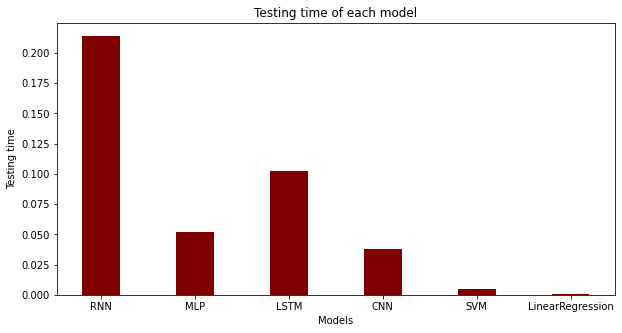

In [ ]:
data = {'RNN':rnn_testing_time,
        'MLP':mlp_testing_time,
        'LSTM':lstm_testing_time,
        'CNN':cnn_testing_time,
        'SVM': svm_testing_time,
        'LinearRegression': lr_testing_time}
models = list(data.keys())
training_times = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, training_times, color ='maroon', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Testing time")
plt.title("Testing time of each model")
plt.show()

Text(0.5, 1.0, 'LR')

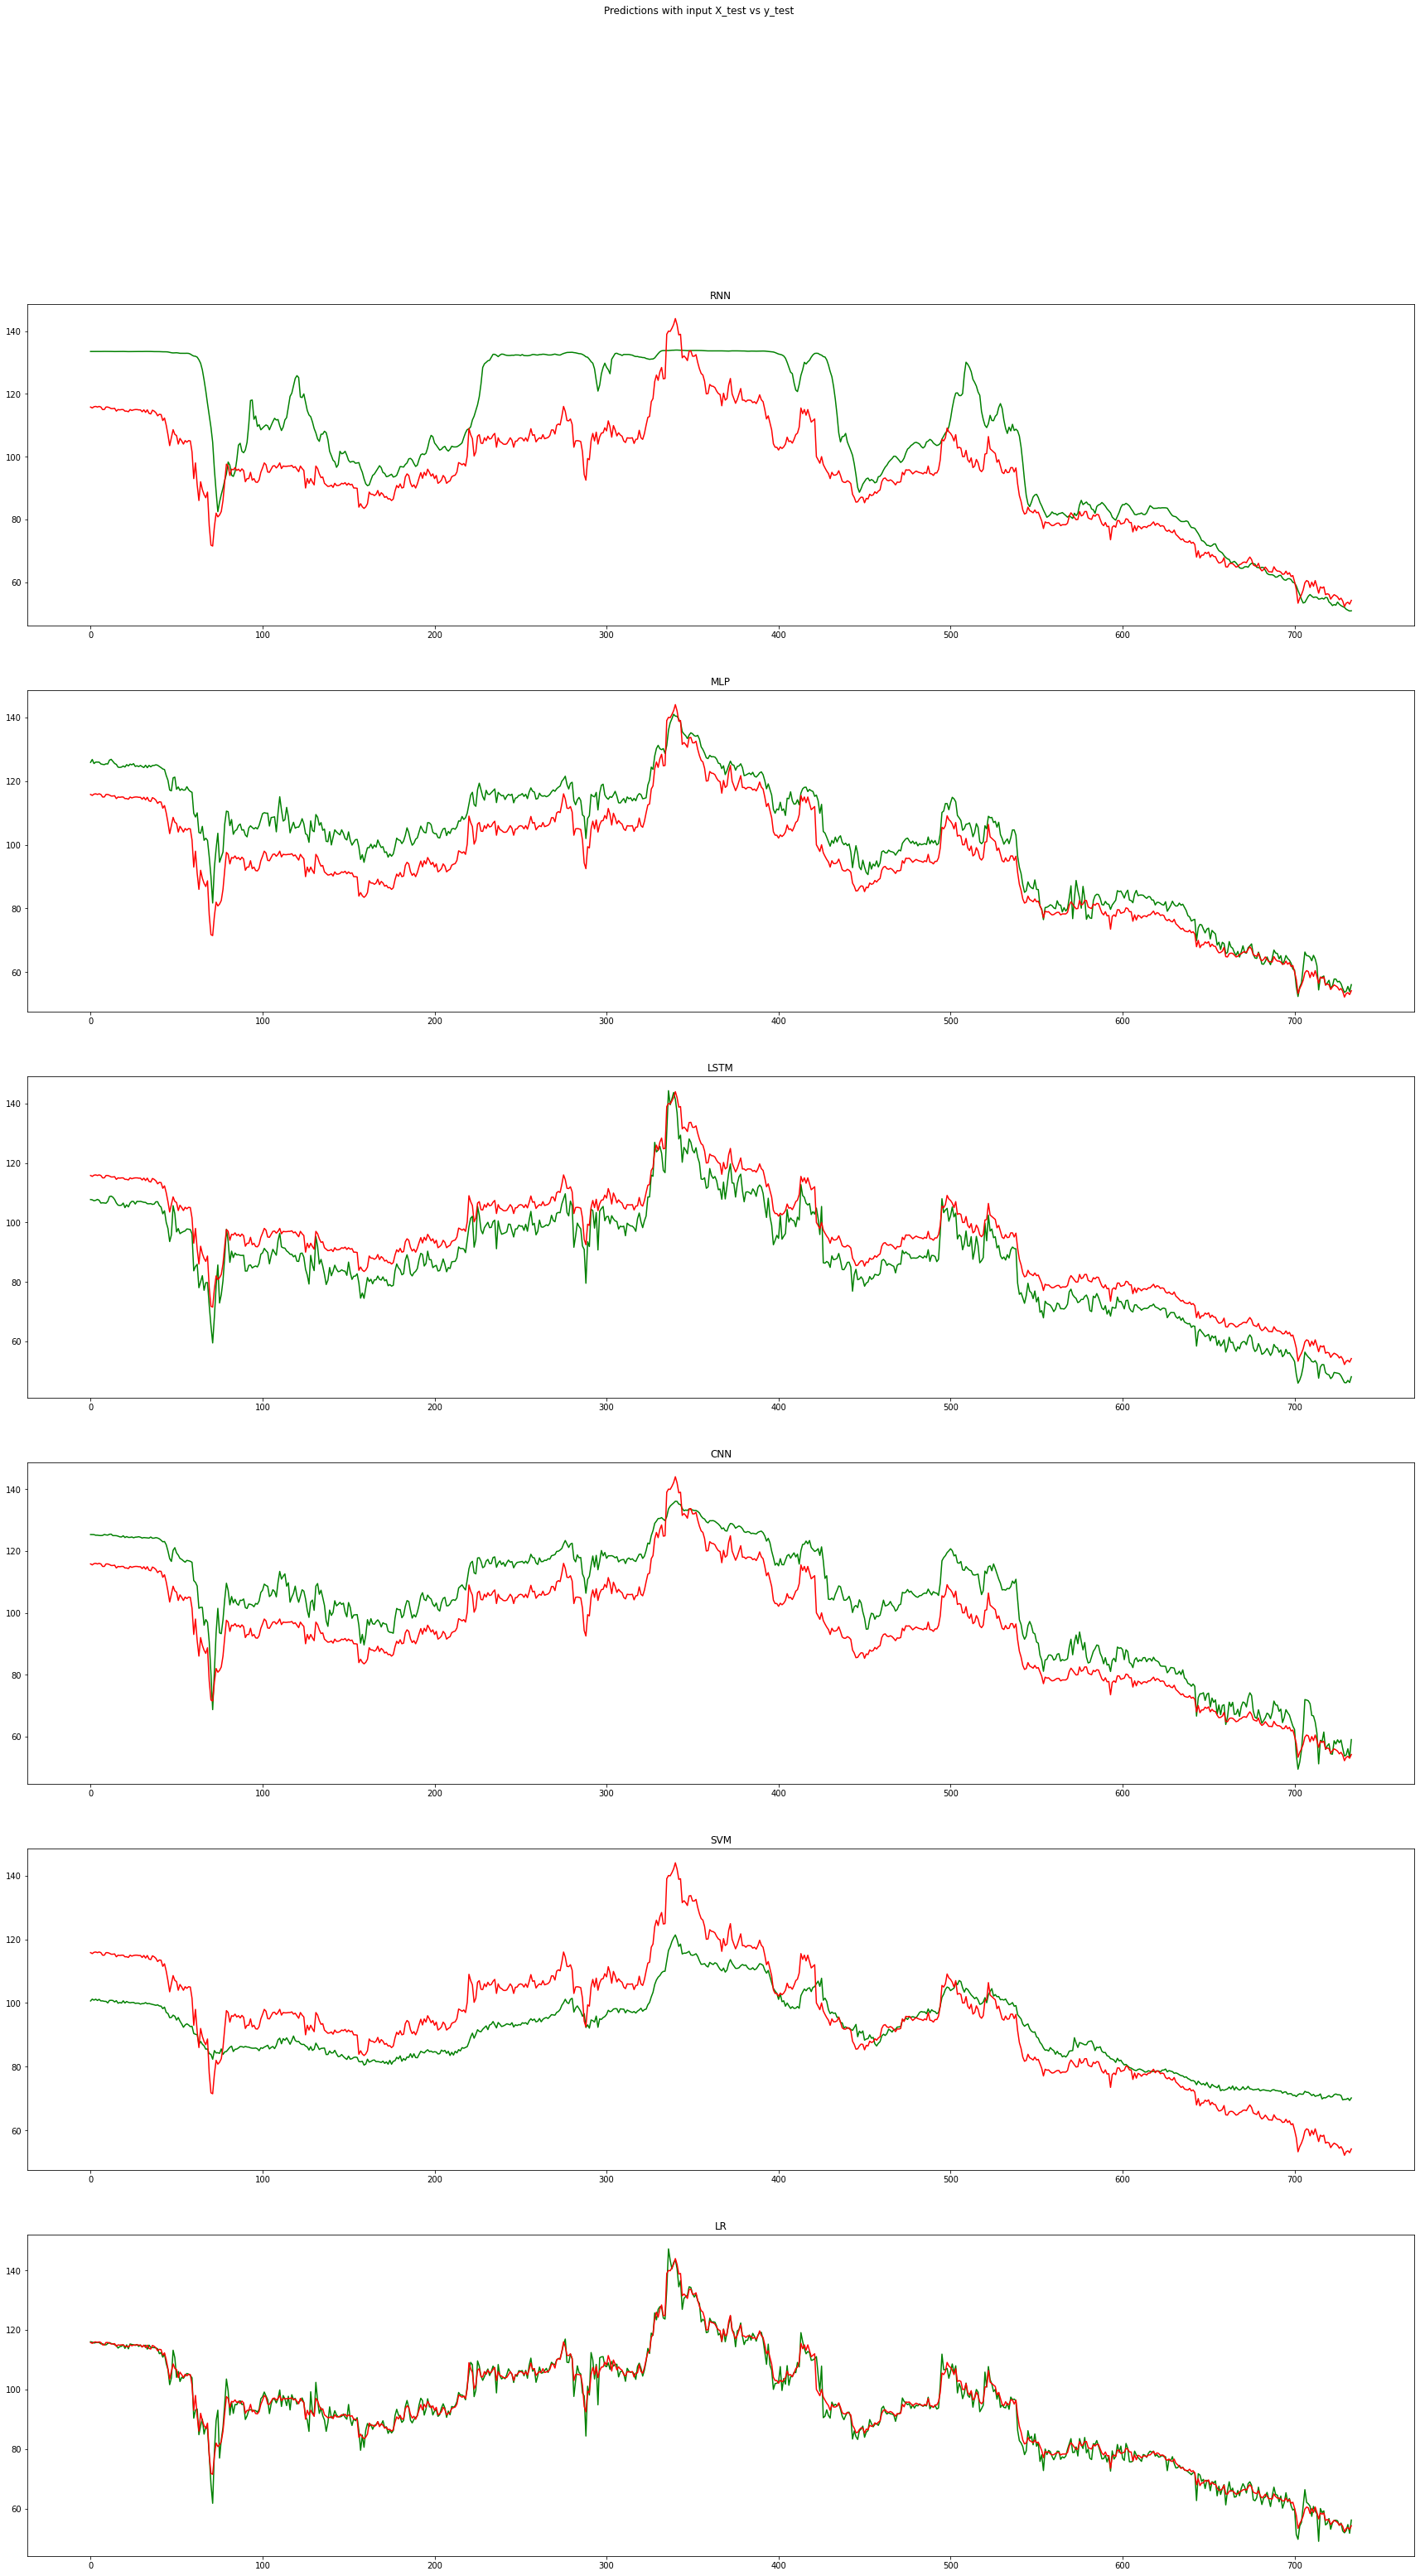

In [ ]:
# visualisation
fig, axs = plt.subplots(6, figsize=(30,50))
fig.suptitle('Predictions with input X_test vs y_test')
axs[0].plot(rnn_y_pred_of_test, color = "g", label = "RNN")
axs[0].plot(y_test, color = "r", label = "y_test")
axs[0].set_title('RNN')
axs[1].plot(mlp_y_pred_of_test, color = "g", label = "MLP")
axs[1].plot(y_test, color = "r", label = "y_test")
axs[1].set_title('MLP')
axs[2].plot(lstm_y_pred_of_test, color = "g", label = "LSTM")
axs[2].plot(y_test, color = "r", label = "y_test")
axs[2].set_title('LSTM')
axs[3].plot(cnn_y_pred_of_test, color = "g", label = "CNN")
axs[3].plot(y_test, color = "r", label = "y_test")
axs[3].set_title('CNN')
axs[4].plot(svm_y_pred_of_test, color = "g", label = "SVM")
axs[4].plot(y_test, color = "r", label = "y_test")
axs[4].set_title('SVM')
axs[5].plot(lr_y_pred_of_test, color = "g", label = "LR")
axs[5].plot(y_test, color = "r", label = "y_test")
axs[5].set_title('LR')

In [ ]:
#RNN
vr_rnn = explained_variance_score(rnn_y_pred_of_test, y_test)
r2_rnn = r2_score(rnn_y_pred_of_test, y_test)

#MLP
vr_mlp = explained_variance_score(mlp_y_pred_of_test, y_test)
r2_mlp = r2_score(mlp_y_pred_of_test, y_test)

#LSTM
vr_lstm = explained_variance_score(lstm_y_pred_of_test, y_test)
r2_lstm = r2_score(lstm_y_pred_of_test, y_test)

#CNN
vr_cnn = explained_variance_score(cnn_y_pred_of_test, y_test)
r2_cnn = r2_score(cnn_y_pred_of_test, y_test)

#SVM
vr_svm = explained_variance_score(svm_y_pred_of_test, y_test)
r2_svm = r2_score(svm_y_pred_of_test, y_test)

#LR
vr_lr = explained_variance_score(lr_y_pred_of_test, y_test)
r2_lr = r2_score(lr_y_pred_of_test, y_test)

In [ ]:
scores = pd.DataFrame([[vr_rnn, vr_mlp, vr_lstm, vr_cnn, vr_svm, vr_lr],
                  [r2_rnn, r2_mlp, r2_lstm, r2_cnn, r2_svm, r2_lr]],
                 index=['explained_variance_score', 'r2_score'],
                 columns=pd.Index(['RNN', 'MLP', 'LSTM', 'CNN', 'SVM', 'LR'], 
                 name='Algorithm')).round(2)
scores

Algorithm                  RNN   MLP  LSTM   CNN   SVM    LR
explained_variance_score  0.82  0.95  0.99  0.96  0.44  0.99
r2_score                  0.58  0.82  0.85  0.75  0.35  0.99

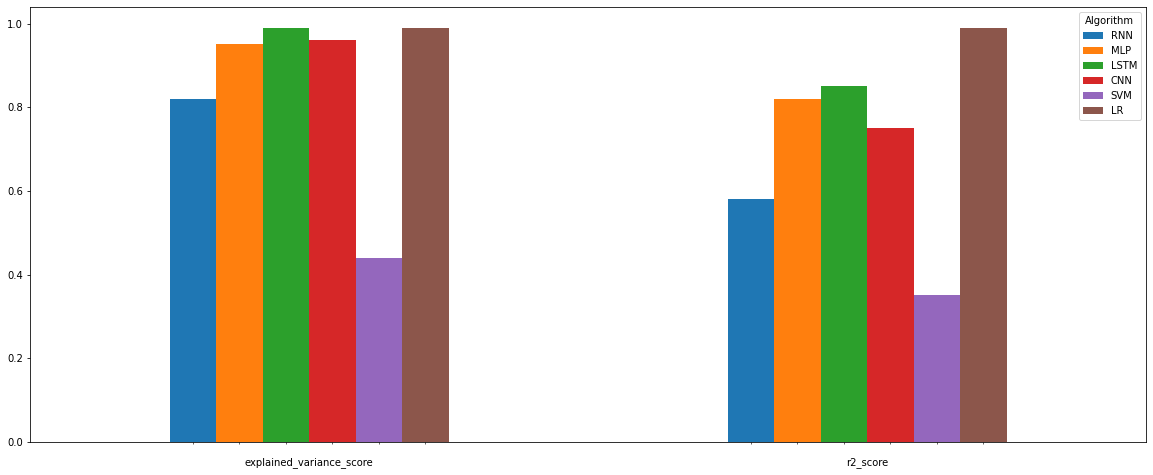

In [ ]:
scores.plot(kind='bar',figsize=(20,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)

ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = scores.columns.values[i//len(df.index.values)]
    lab.append(l)

# ax.set_xticklabels(lab,minor=True)
ax.tick_params(axis='x', which='major', pad=15, size=0)
plt.setp(ax.get_xticklabels(), rotation=0)

plt.show()

Predict for 14 days

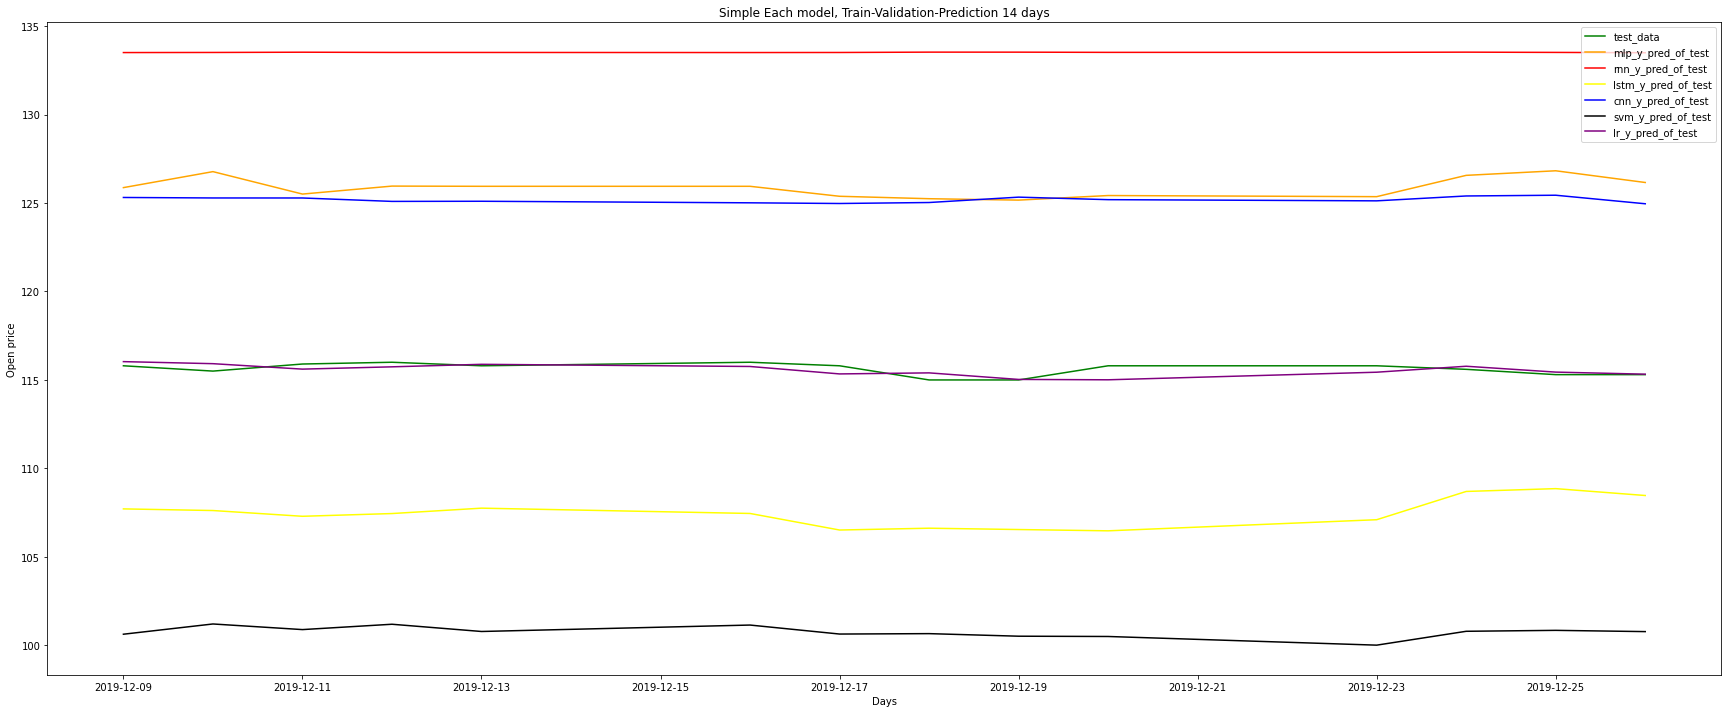

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(validation_data.Date.iloc[time_step:time_step+14], y_test[:14], label = "test_data", color = "g")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], mlp_y_pred_of_test[:14], label = "mlp_y_pred_of_test", color = "orange")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], rnn_y_pred_of_test[:14], label = "rnn_y_pred_of_test", color = "red")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], lstm_y_pred_of_test[:14], label = "lstm_y_pred_of_test", color = "yellow")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], cnn_y_pred_of_test[:14], label = "cnn_y_pred_of_test", color = "blue")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], svm_y_pred_of_test[:14], label = "svm_y_pred_of_test", color = "black")
plt.plot(validation_data.Date.iloc[time_step:time_step+14], lr_y_pred_of_test[:14], label = "lr_y_pred_of_test", color = "purple")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple Each model, Train-Validation-Prediction 14 days")
plt.legend()
plt.show()

Predict for 7 weeks

In [ ]:
rnn_y_pred_of_week = np.add.reduceat(rnn_y_pred_of_test[:49], range(0, 48, 7))/7
mlp_y_pred_of_week = np.add.reduceat(mlp_y_pred_of_test[:49], range(0, 48, 7))/7
lstm_y_pred_of_week = np.add.reduceat(lstm_y_pred_of_test[:49], range(0, 48, 7))/7
cnn_y_pred_of_week = np.add.reduceat(cnn_y_pred_of_test[:49], range(0, 48, 7))/7
svm_y_pred_of_week = np.add.reduceat(svm_y_pred_of_test[:49], range(0, 48, 7))/7
lr_y_pred_of_week = np.add.reduceat(lr_y_pred_of_test[:49], range(0, 48, 7))/7
y_test_of_week = np.add.reduceat(y_test[:49], range(0, 48, 7))/7

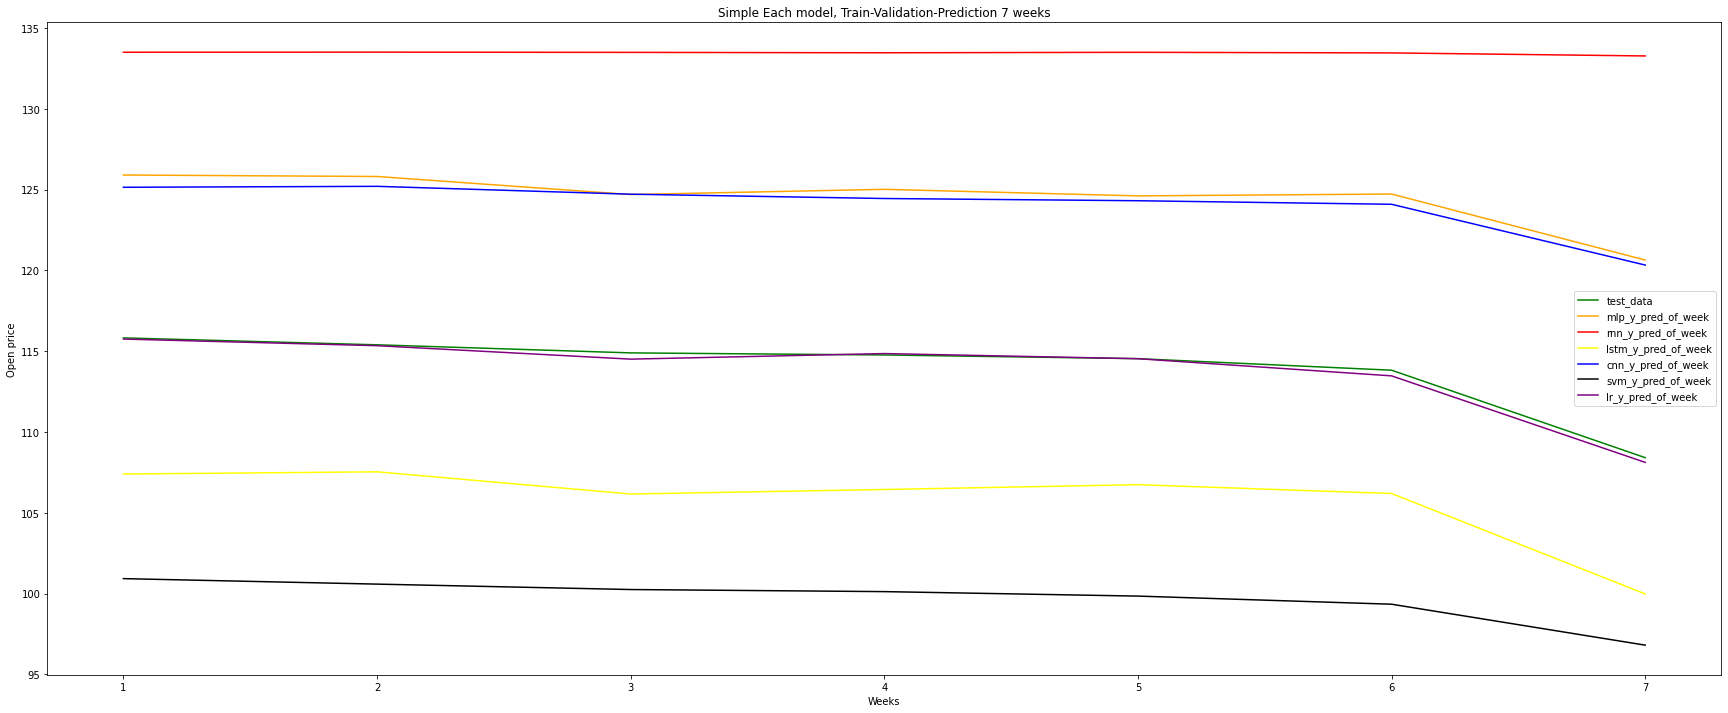

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot([i for i in range(1, 8)], y_test_of_week, label = "test_data", color = "g")
plt.plot([i for i in range(1, 8)], mlp_y_pred_of_week, label = "mlp_y_pred_of_week", color = "orange")
plt.plot([i for i in range(1, 8)], rnn_y_pred_of_week, label = "rnn_y_pred_of_week", color = "red")
plt.plot([i for i in range(1, 8)], lstm_y_pred_of_week, label = "lstm_y_pred_of_week", color = "yellow")
plt.plot([i for i in range(1, 8)], cnn_y_pred_of_week, label = "cnn_y_pred_of_week", color = "blue")
plt.plot([i for i in range(1, 8)], svm_y_pred_of_week, label = "svm_y_pred_of_week", color = "black")
plt.plot([i for i in range(1, 8)], lr_y_pred_of_week, label = "lr_y_pred_of_week", color = "purple")
plt.xlabel("Weeks")
plt.ylabel("Open price")
plt.title("Simple Each model, Train-Validation-Prediction 7 weeks")
plt.legend()
plt.show()

Sau khi áp dụng Early Stopping và Validation trong lúc training, RNN có vẻ như do bị dừng training sớm nên có kết quả không tốt bằng lúc đầu. SVM và Linear Regression thì không hỗ trợ Early Stopping nên không áp dụng, nhưng kết quả đã khá tốt. LSTM, MLP, CNN có kết quả tốt hơn với ban đầu vì được train nhiều hơn lúc đầu và được dừng lúc model đã ổn định.

Finding the feature that affects the stock price the most

"Open"

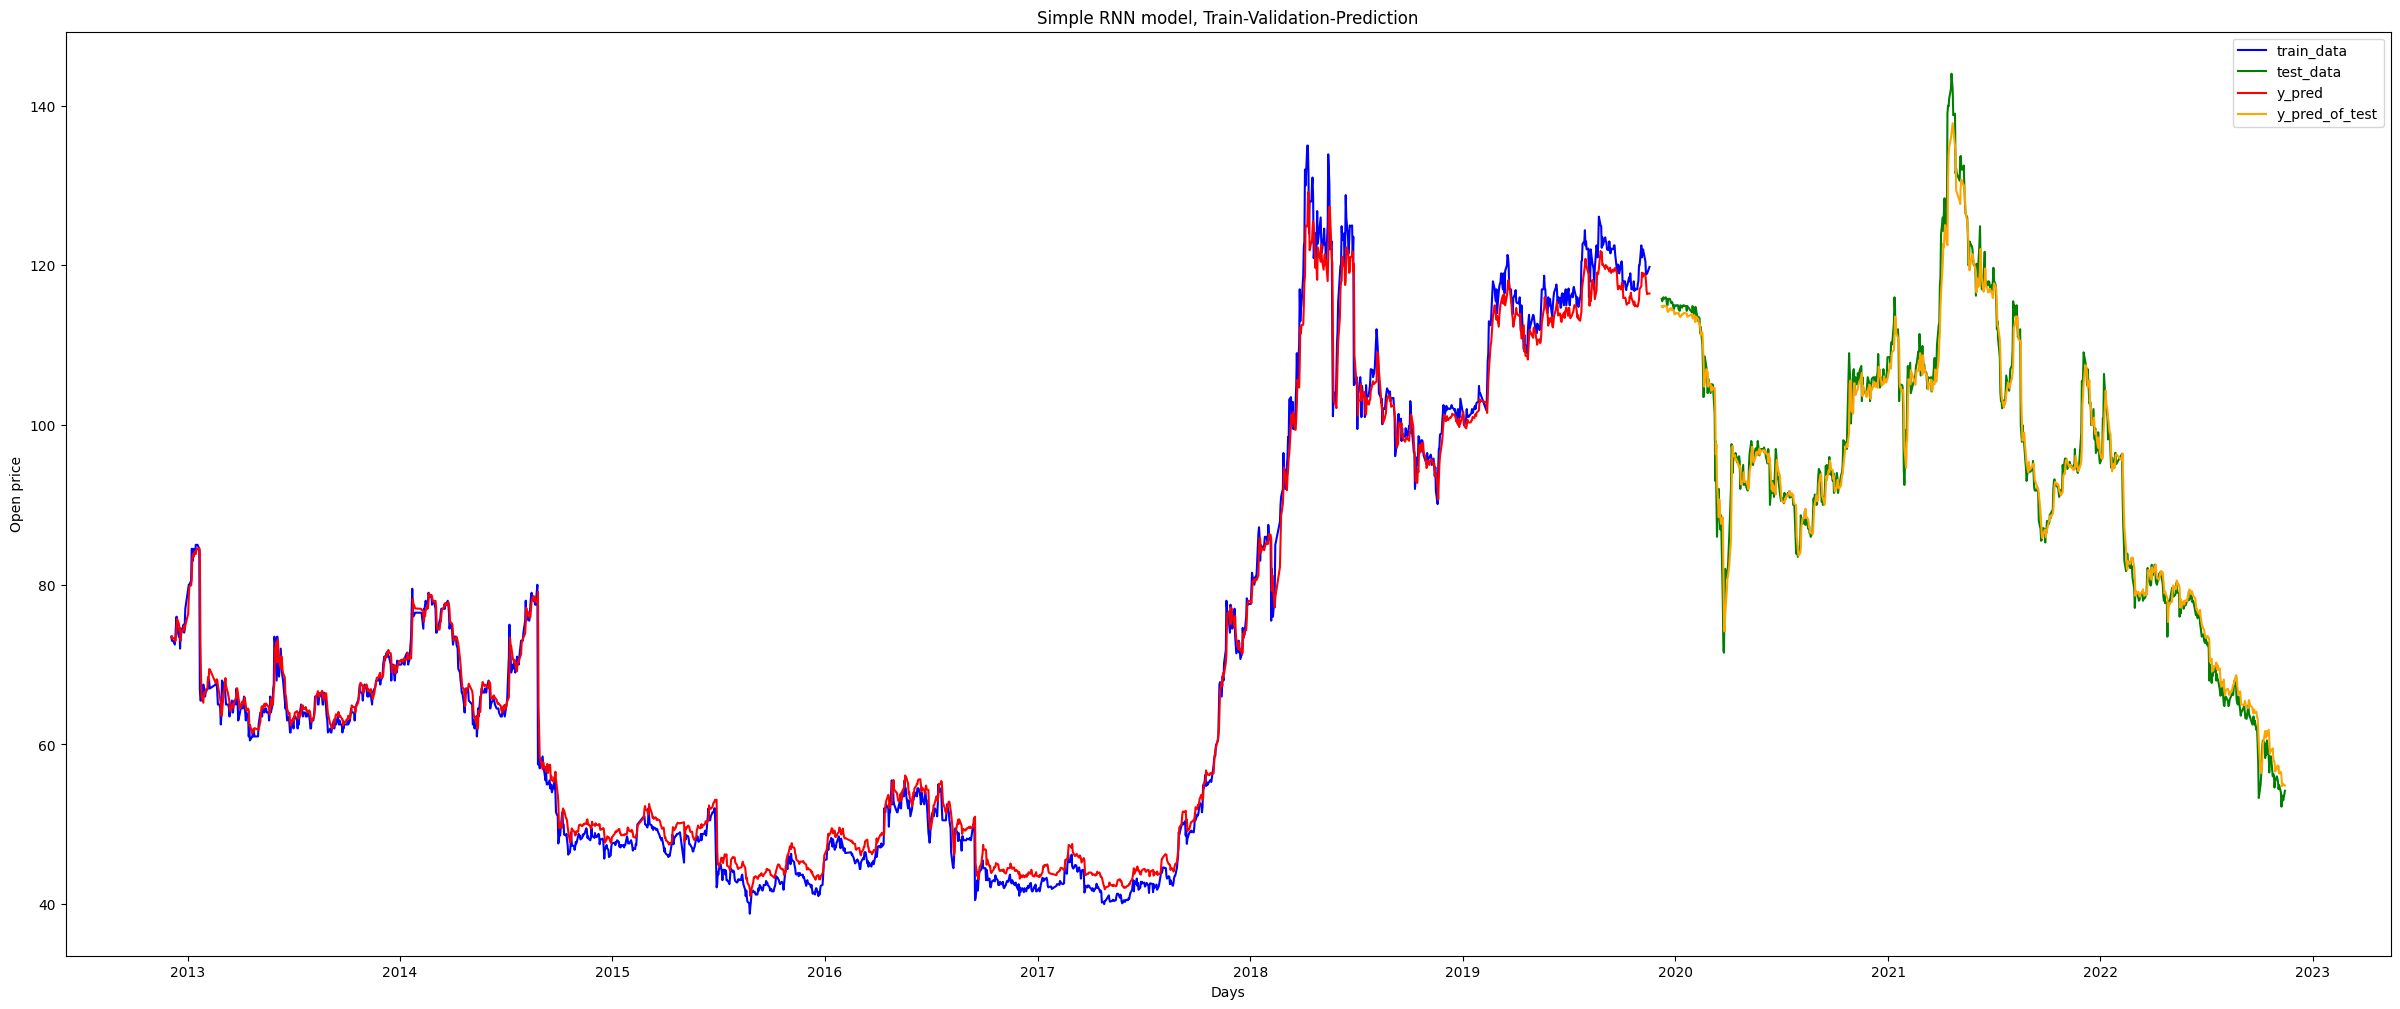

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date.iloc[time_step:], np.reshape(y_train, (len(y_train),)), label = "train_data", color = "b")
plt.plot(validation_data.Date.iloc[time_step:], scaler.inverse_transform(y_test), label = "test_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

"Open", "VN Index Price"

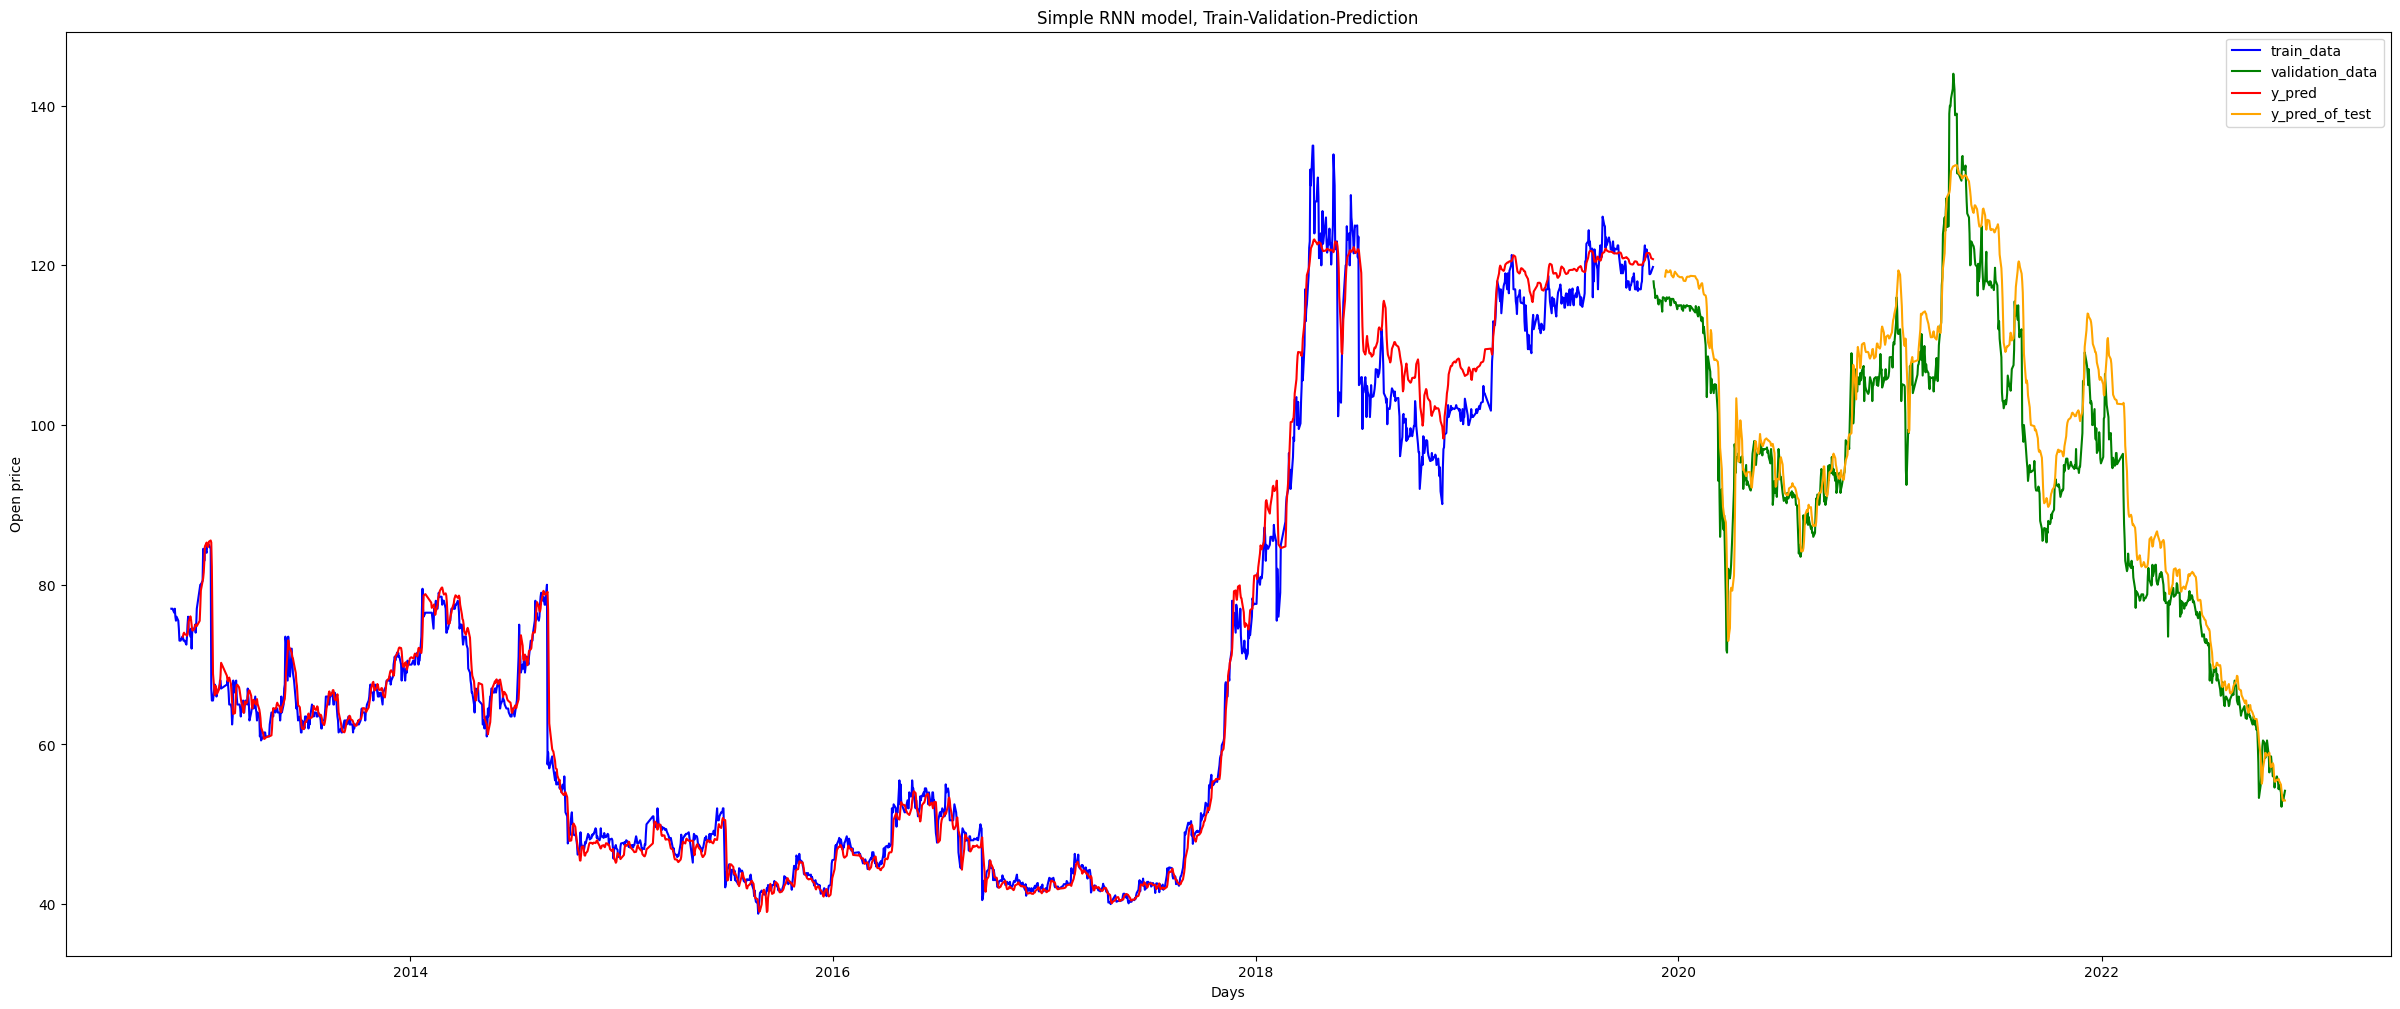

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

"Open", "Adj Close"

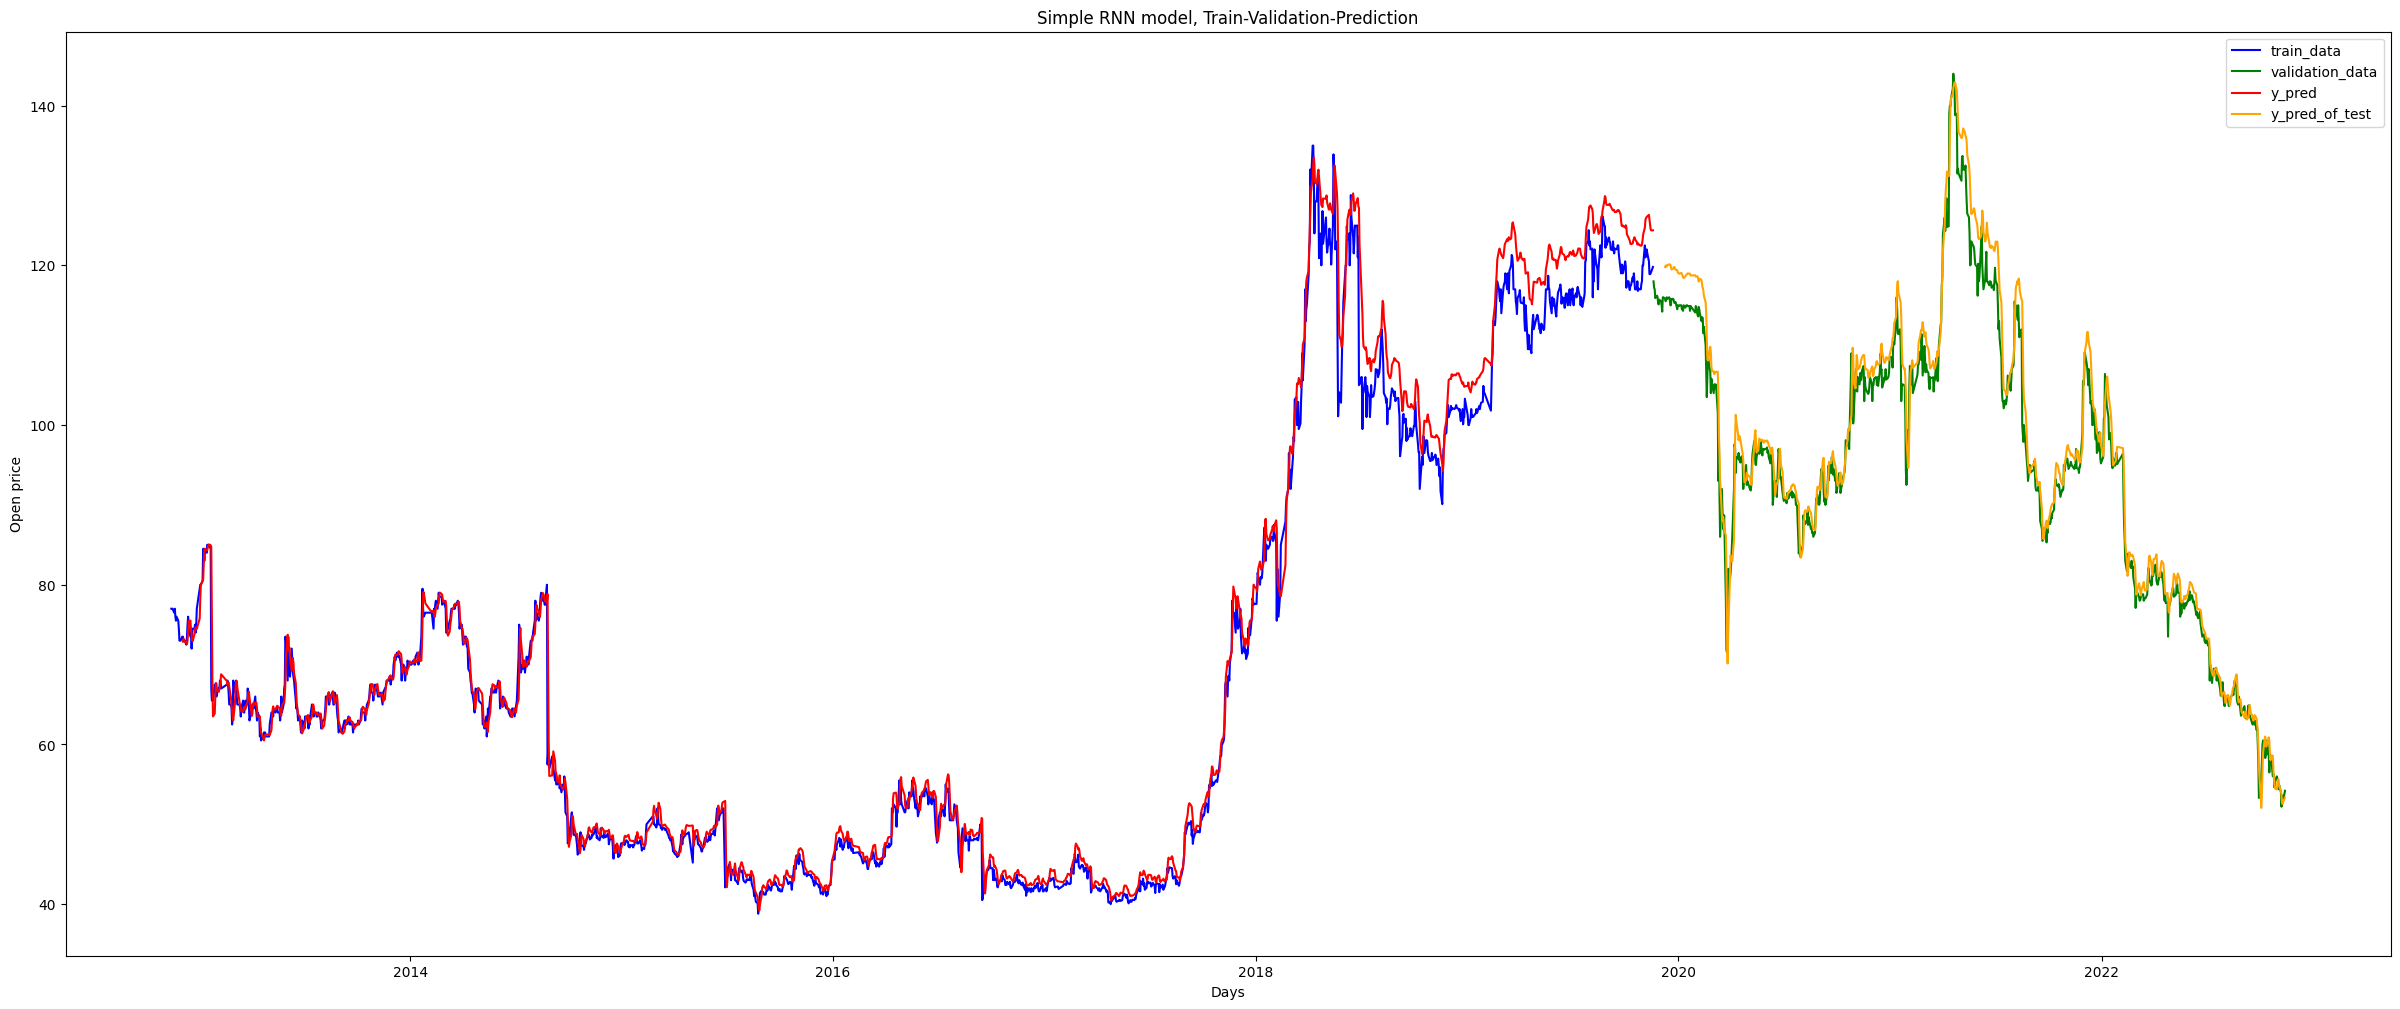

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()


"Open", "Vol"

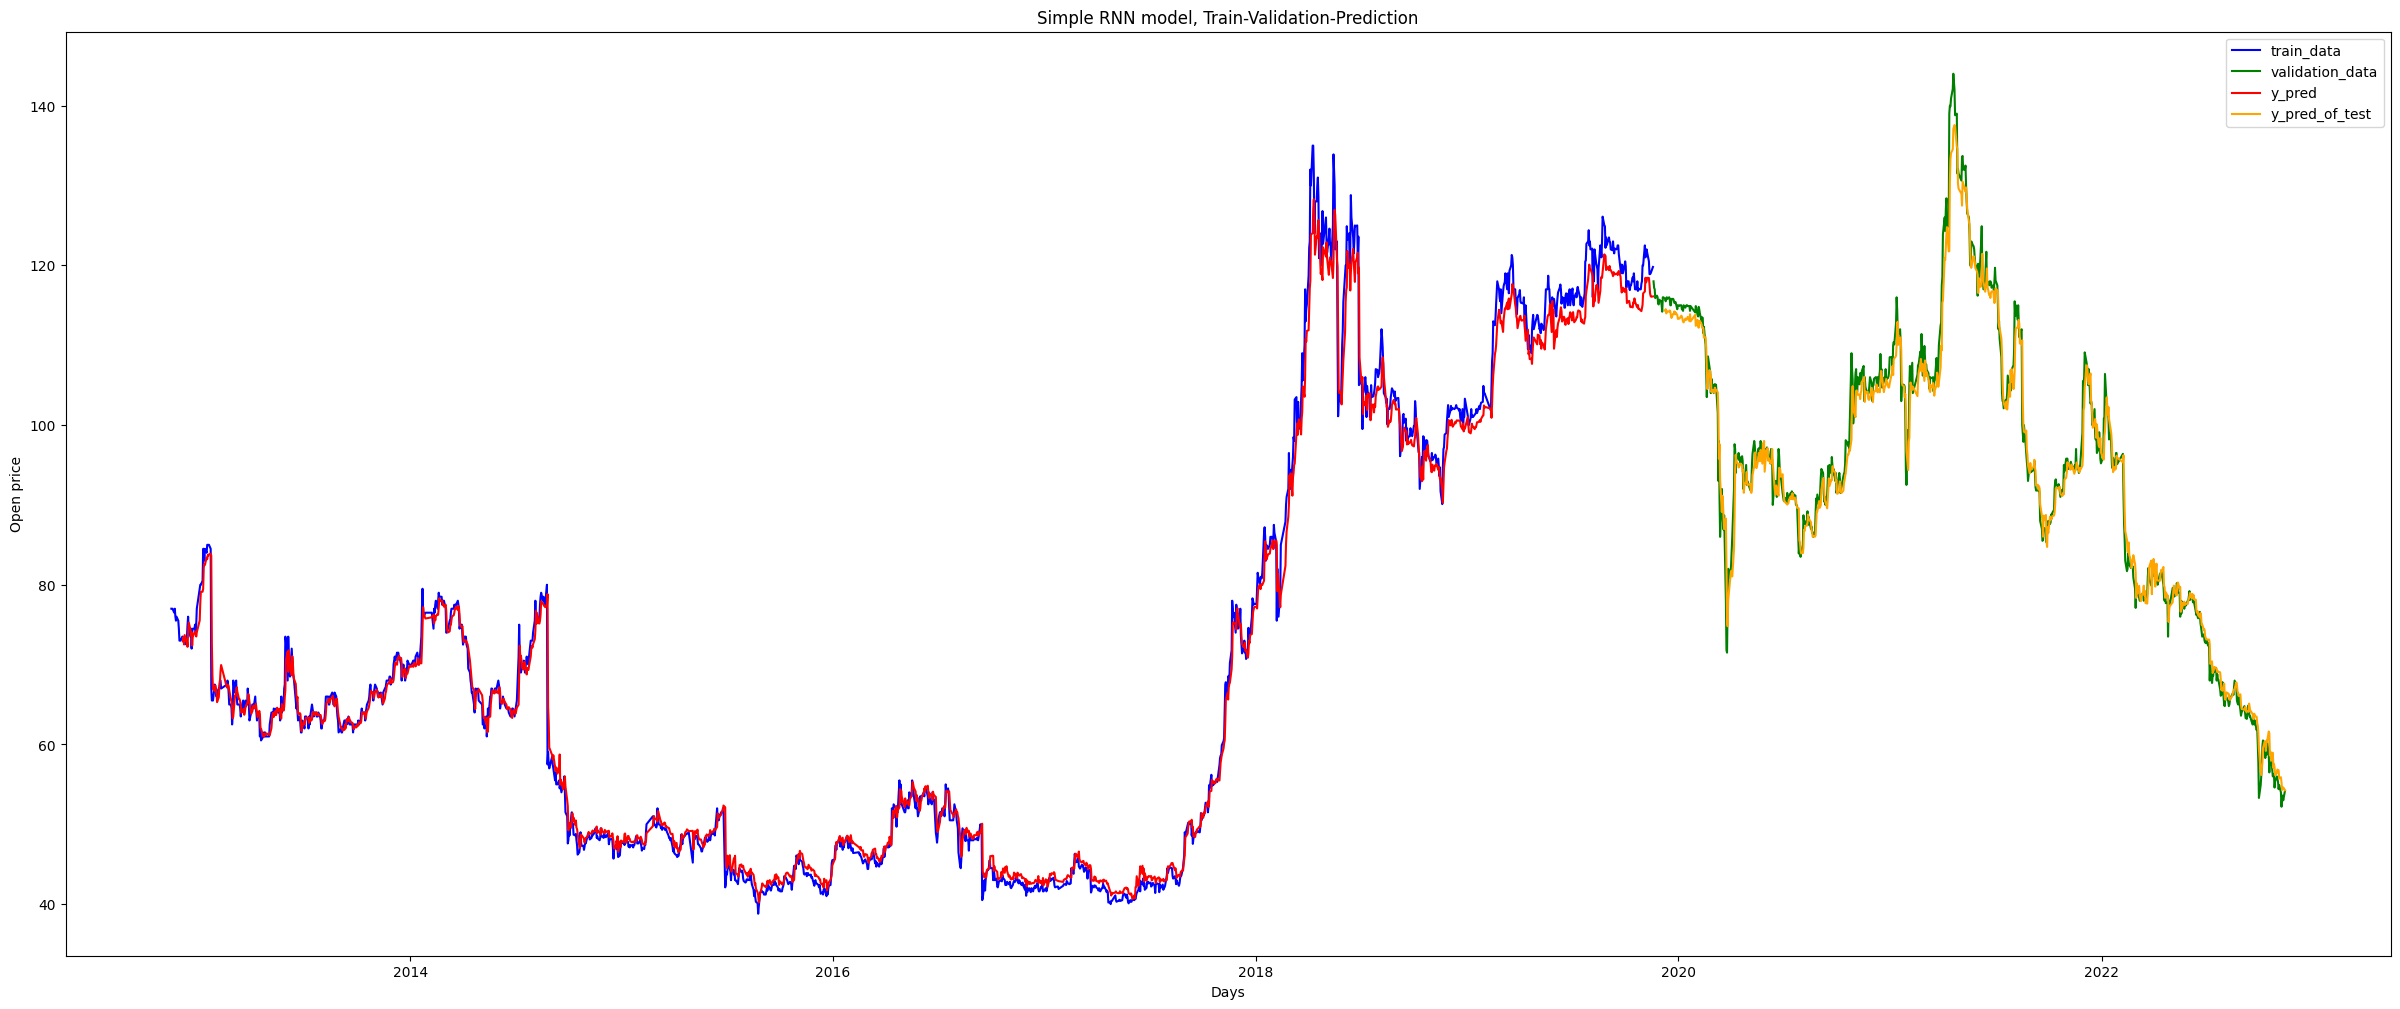

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

"Open", "Total Trade Foreign Quantity", "Total Trade Domestic Quantity"

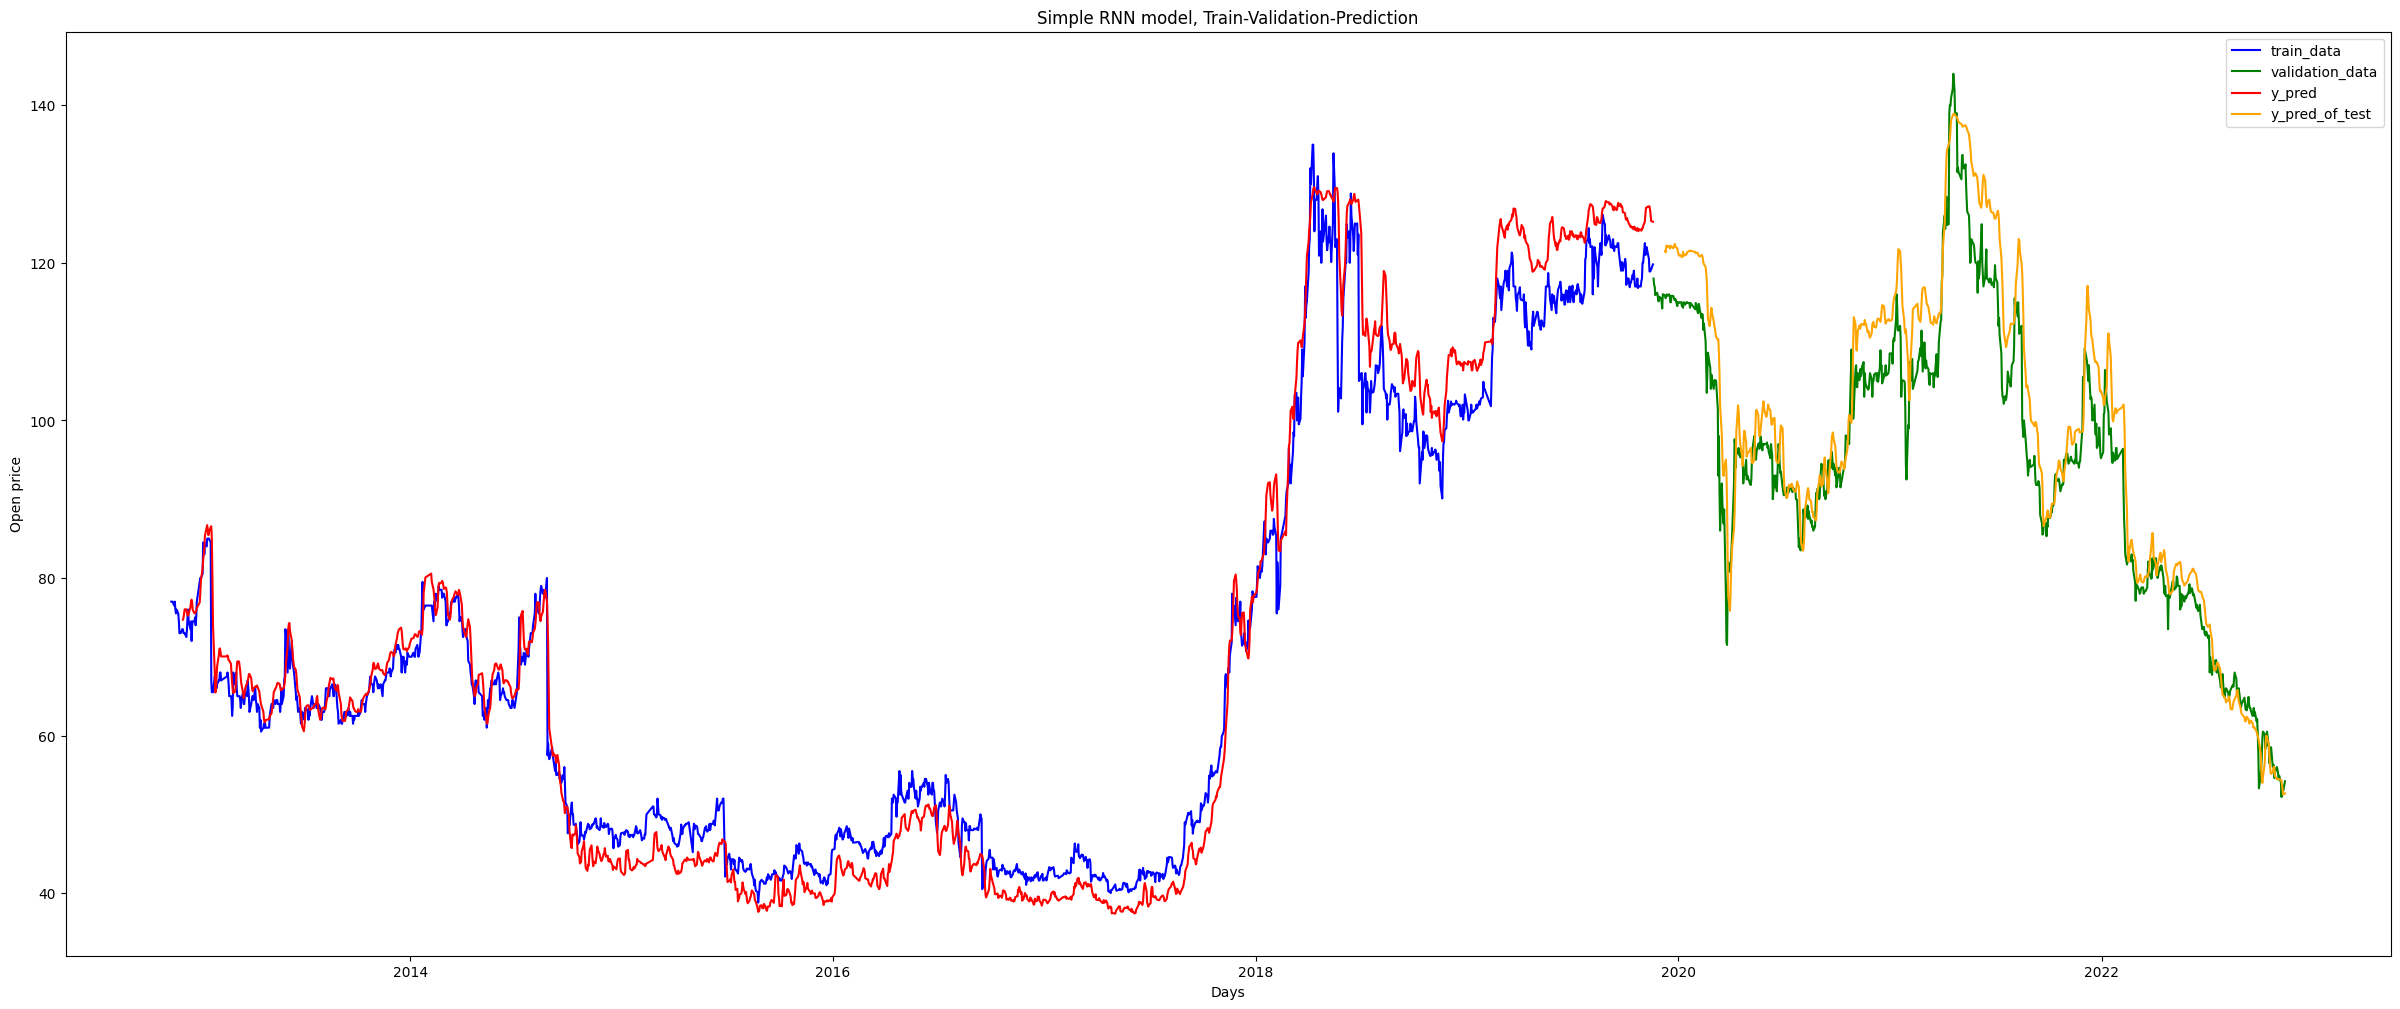

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

"Open", "Change"

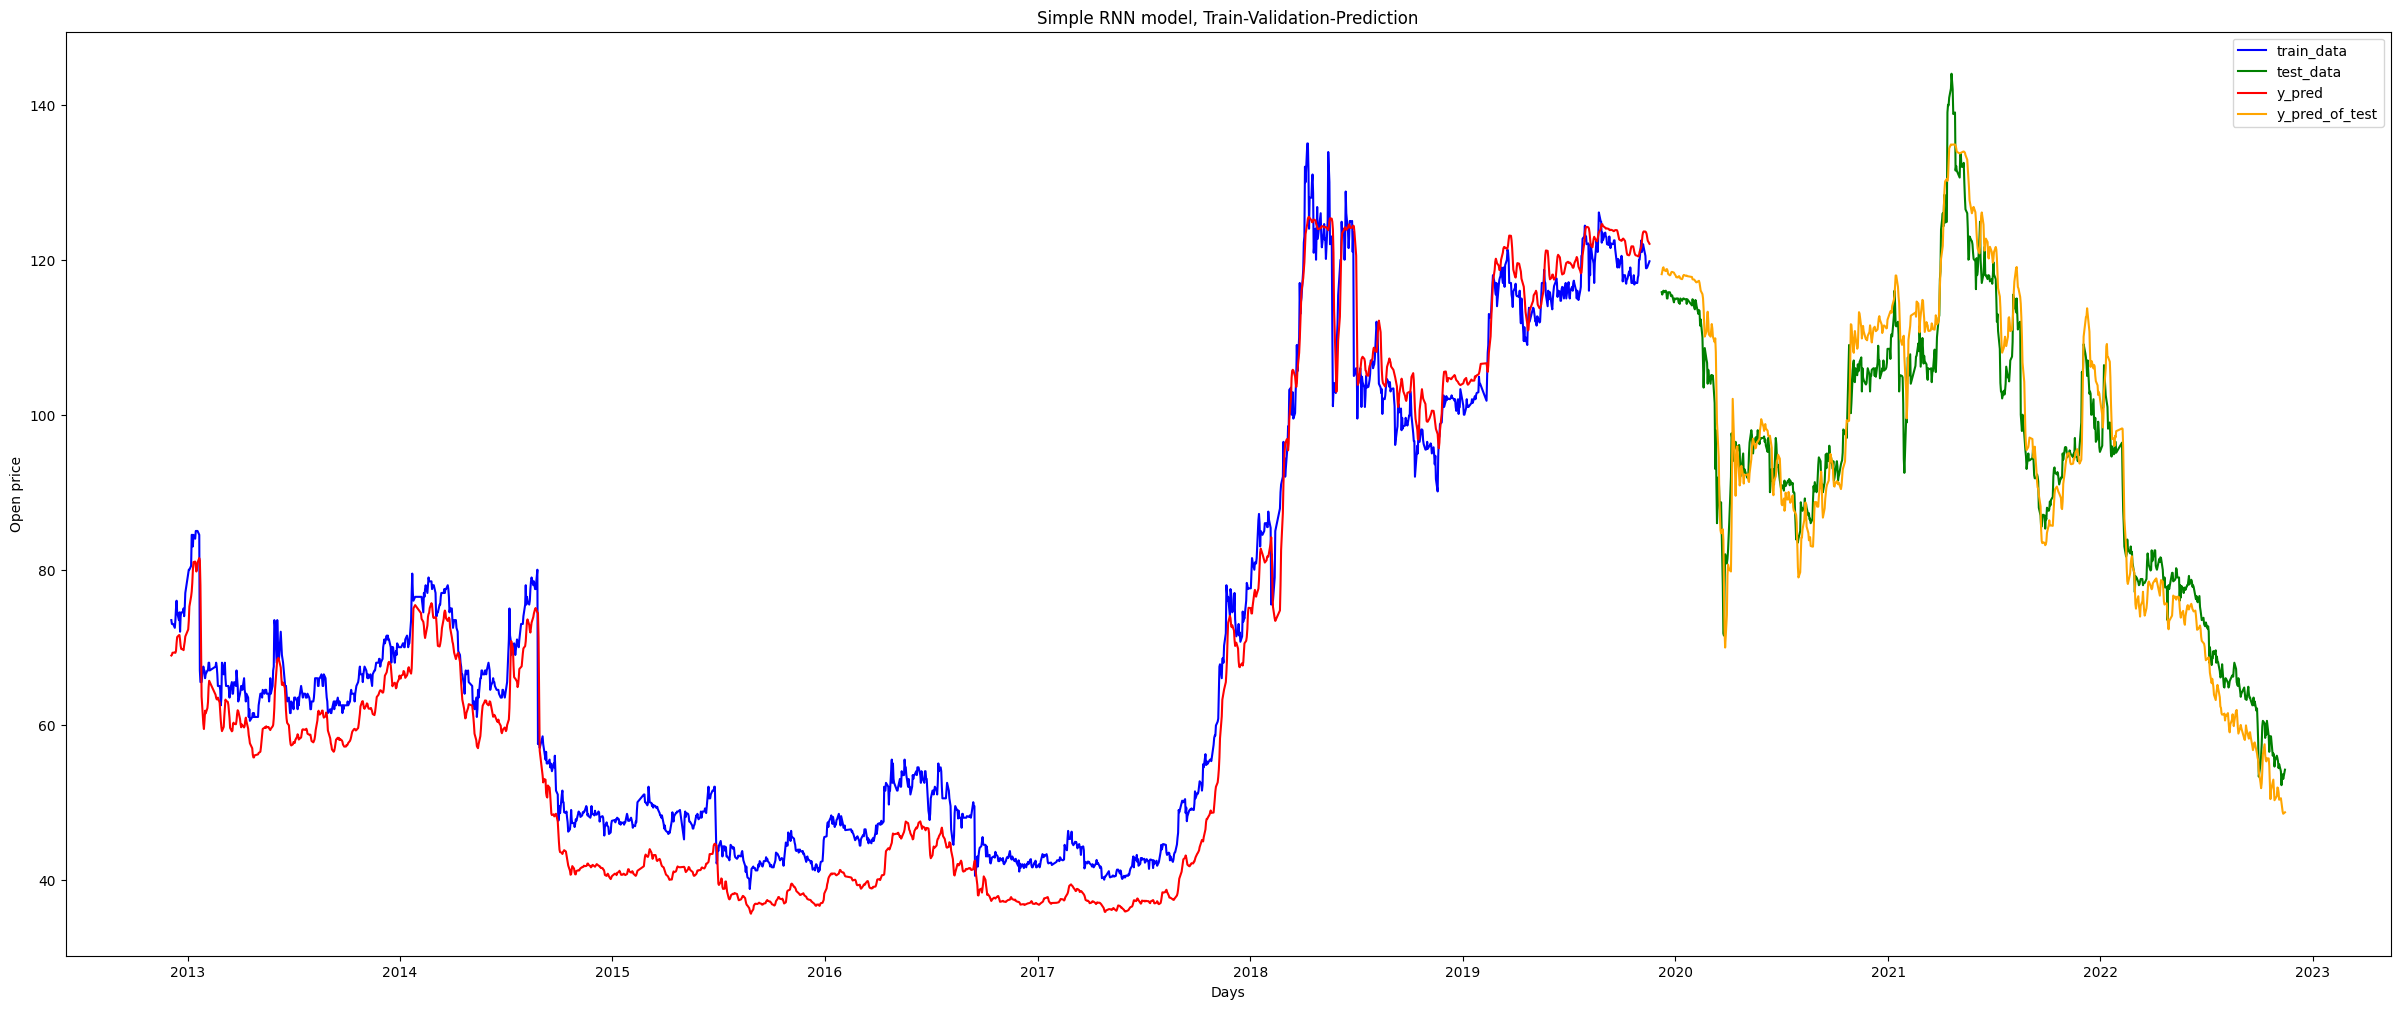

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date.iloc[time_step:], np.reshape(y_train, (len(y_train),)), label = "train_data", color = "b")
plt.plot(validation_data.Date.iloc[time_step:], scaler2.inverse_transform(y_test), label = "test_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

Qua cách thử các tập features khác nhau để train model và dự đoán thì có thể rút ra kết luận feature Vol có ảnh hưởng lớn nhất đối với giá cổ phiếu.